# 0.1 Imports

In [202]:
import pickle
import pandas  as pd
import seaborn as sns
import numpy   as np
import scikitplot as skplt

import matplotlib.pyplot         as plt


from boruta  import BorutaPy
from sklearn import linear_model as lm
from sklearn import preprocessing as pp
from sklearn import model_selection as ms
from sklearn import ensemble as en
from sklearn import neighbors as nh
from tabulate import tabulate


from sklearn.metrics import top_k_accuracy_score
from IPython.core.display import HTML 
from IPython.display             import Image


# 0.2 Helper Functions

In [203]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()

In [204]:
%matplotlib inline 
%matplotlib notebook

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option ('display.expand_frame_repr', False)

sns.set()

In [205]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['indices', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1.0 Data Description

## 1.1 Loading data

In [391]:
df1= pd.read_csv ('/Users/adriele/Documents/repos/pa004/dataset/data.csv')

### 1.1.1 Rename columns

In [392]:
# rename columns
df1.columns = ['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
               'driving_license', 'vehicle_age', 'vehicle_damage',
               'previously_insured', 'annual_premium', 'vintage', 'response']



## 1.2 Data Dimensions

In [393]:
print( 'Number of Cols {}'.format( df1.shape[1] ) )
print( 'Number of Rows {}'.format( df1.shape[0] ) )

Number of Cols 12
Number of Rows 131948


## 1.3 Check NA

In [426]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 1.4 Check Data Types

In [427]:
df1.dtypes

id                       int64
gender                  object
age                      int64
region_code              int64
policy_sales_channel     int64
driving_license          int64
vehicle_age             object
vehicle_damage          object
previously_insured       int64
annual_premium           int64
vintage                  int64
response                 int64
dtype: object

## 1.5 Descriptive Startistical 

In [428]:
num_attributes = df1.select_dtypes ( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes ( exclude = ['int64', 'float64'] )

### 1.5.1 Numerical Atributes

In [429]:

# Central tedency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply ( np.median ) ).T

# Dispersin - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min () )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew () )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis () ) ).T

n = pd.concat([ d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
n.columns = [ 'atributtes', 'min', 'max', 'range', 'mean', 'median','std', 'skew', 'kurtosis' ]
n

,atributtes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.0,131947.0,131947.0,65973.500000,65973.5,38090.106658,0.000000,-1.200000
1,age,45.0,85.0,40.0,56.939635,55.0,9.469115,0.640036,-0.649460
2,region_code,0.0,52.0,52.0,26.985388,28.0,12.310347,-0.209233,-0.407361
3,policy_sales_channel,1.0,163.0,162.0,74.217237,30.0,53.440006,0.200884,-1.768637
4,driving_license,0.0,1.0,1.0,0.994096,1.0,0.076609,-12.899263,164.393472
5,previously_insured,0.0,1.0,1.0,0.313427,0.0,0.463886,0.804403,-1.352957
6,annual_premium,2630.0,540165.0,537535.0,32301.524040,34034.5,19160.604775,1.920845,36.133813
7,vintage,10.0,299.0,289.0,154.276010,154.0,83.644379,0.001730,-1.201913
8,response,0.0,1.0,1.0,0.159517,0.0,0.366158,1.859780,1.458803


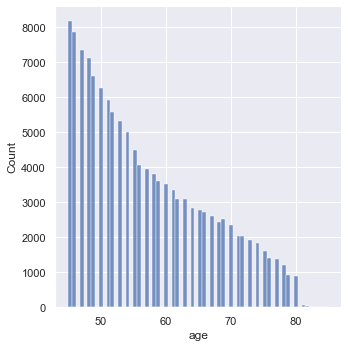

In [430]:
sns.displot( df1['age'])

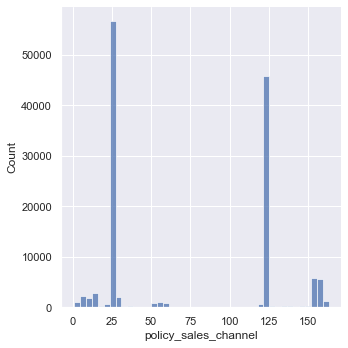

In [431]:
sns.displot( df1['policy_sales_channel'])

### 1.5.2 Attributes Category

In [432]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

<AxesSubplot:xlabel='vehicle_damage', ylabel='annual_premium'>

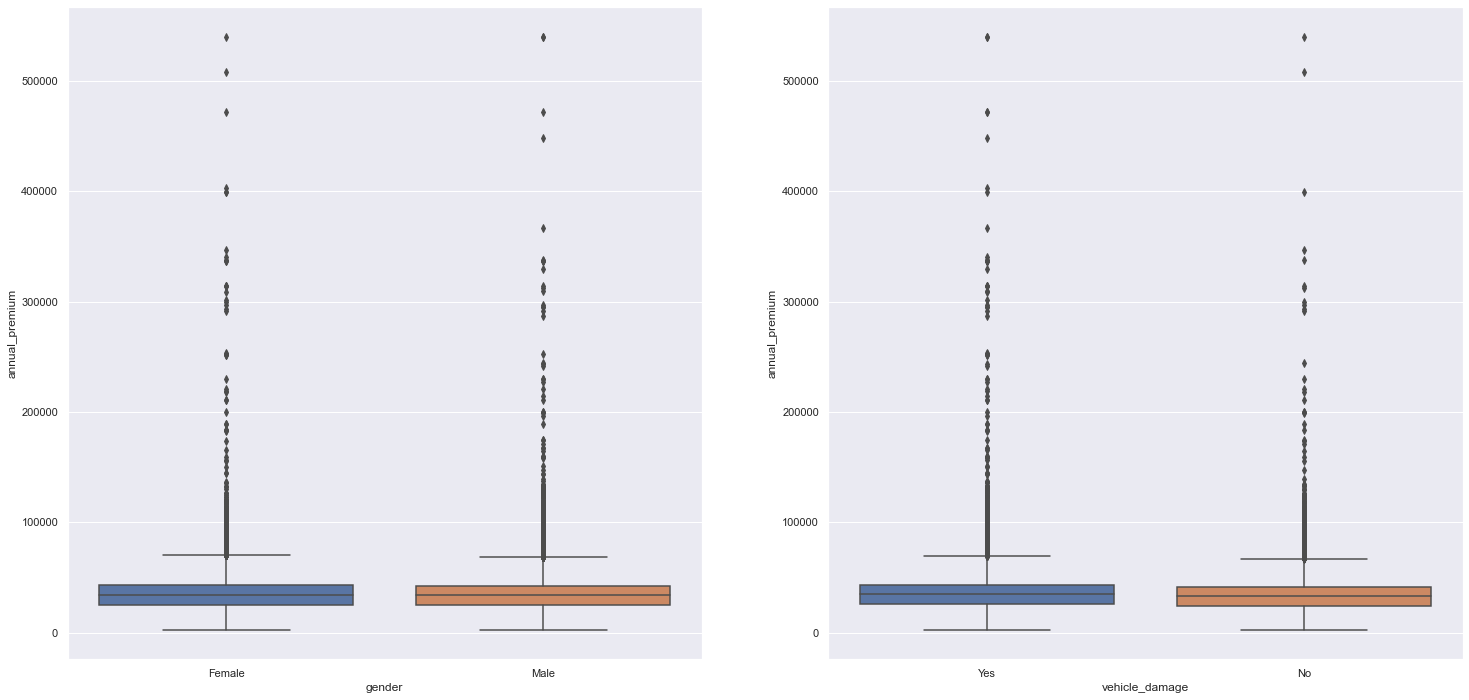

In [433]:
aux1 = df1[( df1[ 'gender' ] != '0') & (df1[ 'annual_premium' ] >0 )]

plt.subplot (1, 2, 1)
sns.boxplot (x = 'gender', y='annual_premium', data = aux1)

plt.subplot (1, 2, 2)
sns.boxplot (x = 'vehicle_damage', y='annual_premium', data = aux1)

# 2.0 Feature Engeneering - Mind Map

In [434]:
df2 = df1.copy()

# Vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'over_2_years' 
                                              if x == '> 2 Years' else 'between_1_2_years' 
                                              if x == '1-2 Year' else 'below_1_year')

# Vehicle demage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'yes' else 0)

## 2.1 Mind Map

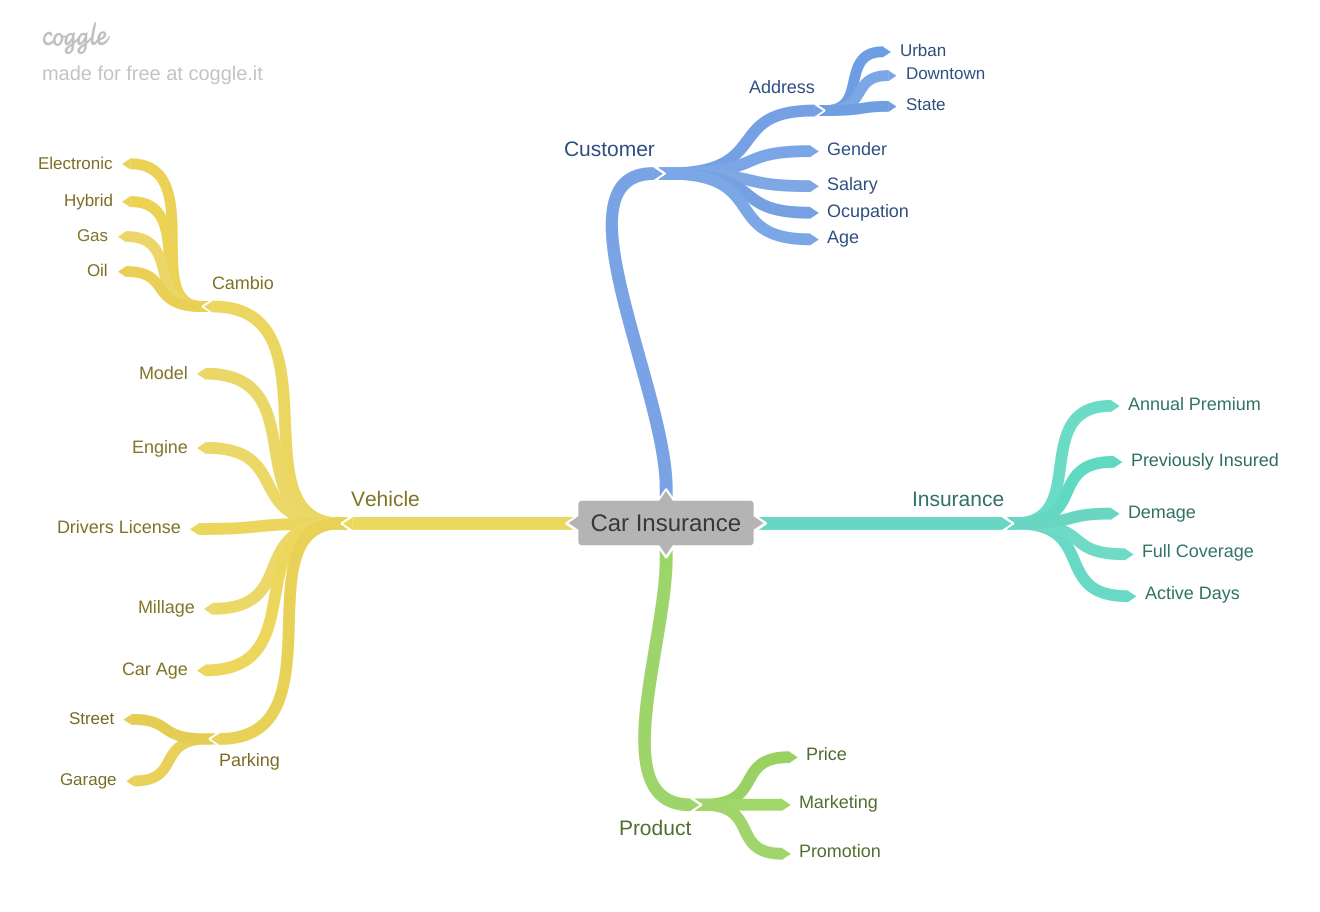

In [435]:
Image ('/Users/adriele/Documents/repos/pa004/image/mindmap.png')

## 2.2 Hypothesy List

Customer 

- 50% of female customers would be interested on the car insurance.
- Customers over 50 years old would be interested on the car insurance.
- Customers with salary up to 40k annually would be interested on the car insurance.
- 80% of Field customers wouldn't be interested on the car insurance.
- Customer outside of State wouldn't be interested on the car insurance.


Vehicle

- Customers who has cars less than one year are insterested on the car insurance.
- Customers who park doesn't have privately park are intereste on the car insurance.
- 30% of customers who has driver license would be insterested on the car insurance.
- Vehicle with new models would be insterested on the car insurance.
- 90% of car work by gas.

Insurance

- Customer with more than one damage car would be insterested on the car insurance.
- Customers that paid for annually premmiun less than 40.000 would be insterested on the car insurance.
- Customers up to 120 days of association on Health Insurance would be insterested on the car insurance.
- 80% of customers who had a previously insurance wouldn't be interested on the car insurance.



### 2.2.1  Final Hyphotesis List

- H1. 50% of female customers would be interested on the car insurance.
- H2. Customers over 50 years old would be interested on the car insurance.
- H3. 80% of Field customers wouldn't be interested on the car insurance.
- H4. Feature study - Policy Sales 
- H5. 30% of customers who has driver license would be insterested on the car insurance.
- H6. Customers who has cars less than one year are insterested on the car insurance.
- H7. H7. Feature Study - Vehicle Demage
- H8. 80% of customers who had a previously insurance wouldn't be interested on the car insurance.
- H9. Customers that paid for annually premmiun less than 40.000 would be insterested on the car insurance.
- H10. Customers up to 120 days of association on Health Insurance would be insterested on the car insurance.


# 3.0 Filtering Variables

In [436]:
df3 = df2.copy()

# 4.0 Exploratory Data Analysis

In [437]:
df4 = df3.copy()

## 4.1 Univariate Analysis

### 4.1.1 Response variable

/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='response', ylabel='Density'>

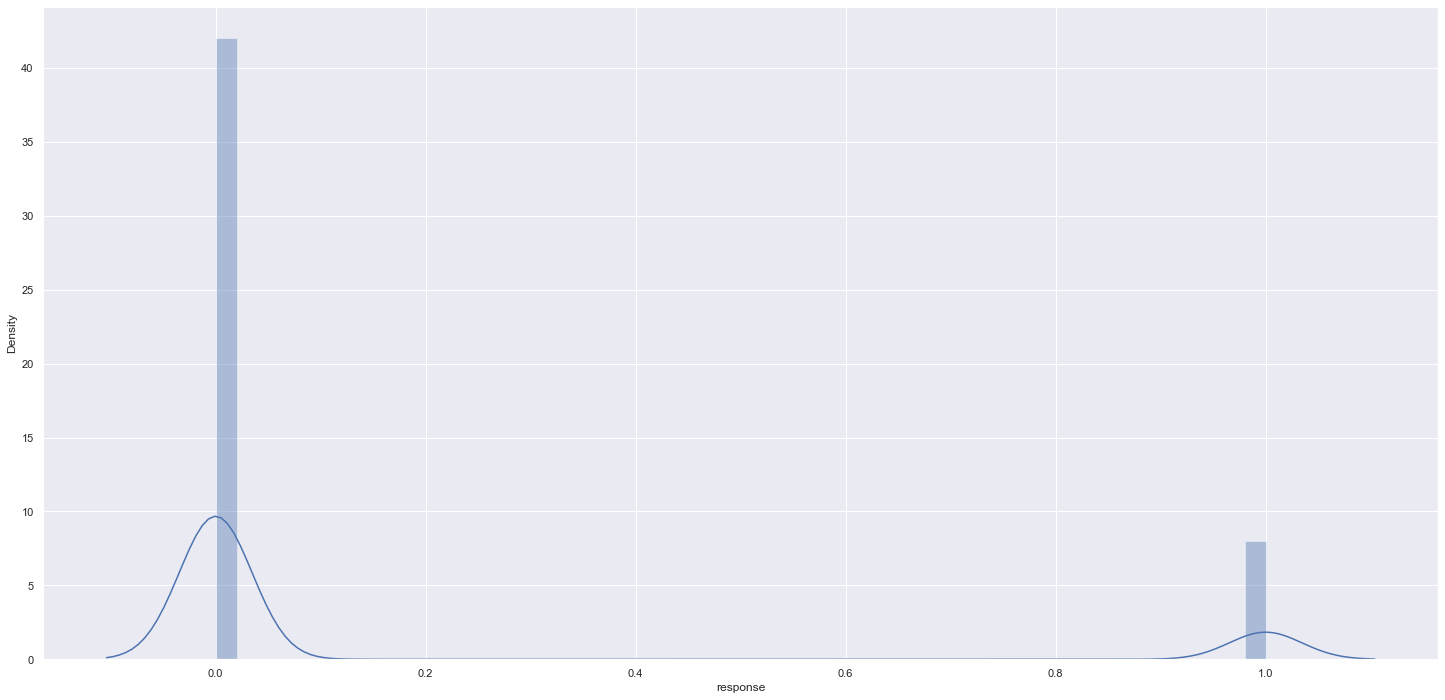

In [438]:
sns.distplot (df4['response'])

### 4.1.2 Numerical Variable

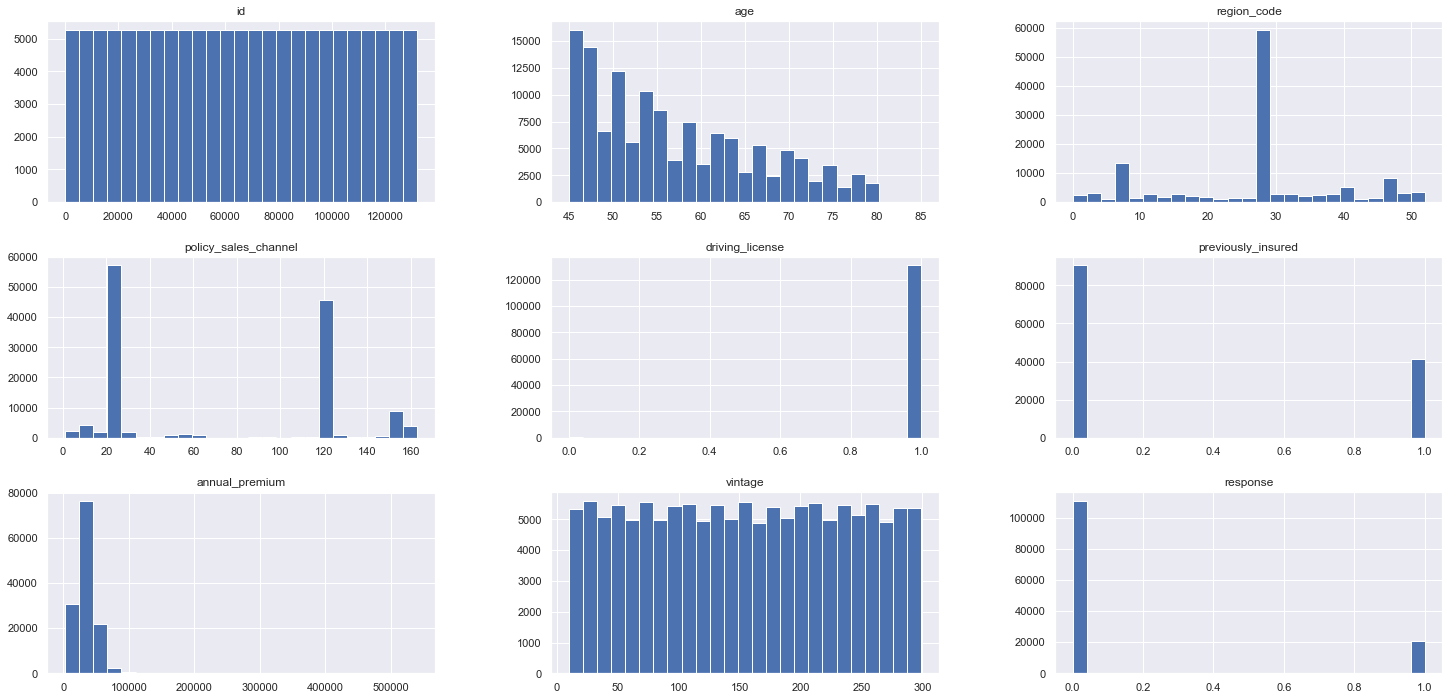

In [439]:
num_attributes.hist(bins =25);

### 4.1.3 Categorical Variable

In [440]:
cat_attributes.columns

Index(['gender', 'vehicle_age', 'vehicle_damage'], dtype='object')

/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

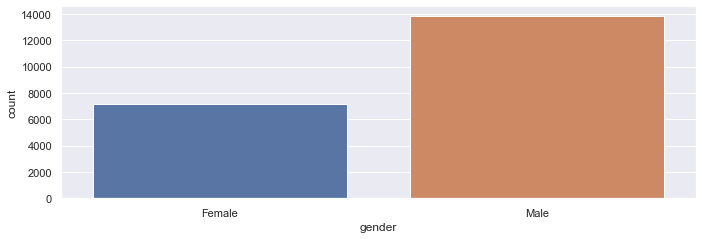

In [441]:
# Gender 
plt.subplot(3, 2, 1)
a = df4.loc[df4['response'] == 1, 'gender']
sns.countplot(a)

# plt.subplot(3, 2, 2)
# sns.kdeplot( a, label='a', shade=True)

# plt.subplot(3, 2, 3)
# sns.kdeplot(df4[df4['vehicle_damage'] == 'yes']['response'], label='a', shade=True)



## 4.2 Bivariate Analysis - Hipothesys Validatin

### <font color='orange'> 4.2.1- H1. 50% of female customers would be interested on the car insurance.
    
   <font color='green'> False - Just 5.44% are interested

/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

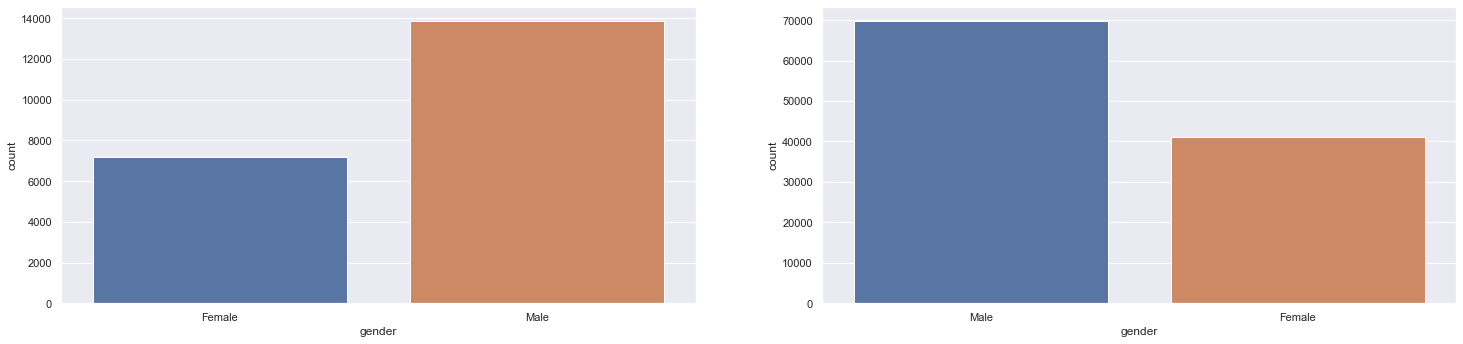

In [442]:
plt.subplot(2, 2, 1)
h0 = df4.loc[df4['response'] == 1, 'gender']
sns.countplot(h0)


plt.subplot(2, 2, 2)
h1 = df4.loc[df4['response'] == 0, 'gender']
sns.countplot(h1)




In [443]:
h6 = df4[['gender', 'response']].value_counts( normalize=True ).reset_index()
h6

,gender,response,0
0,Male,0,0.529080
1,Female,0,0.311403
2,Male,1,0.105087
3,Female,1,0.054431


- 31% Female customers are not interested.
- 5.44% Female customers interested.


- 52% Male customers are not interested.
- 10% Male customers are interested.

### <font color='orange'>  4.2.2- H2. Customers over 50 years old would be interested on the car insurance.

    
<font color='red'> False

<AxesSubplot:xlabel='age', ylabel='Count'>

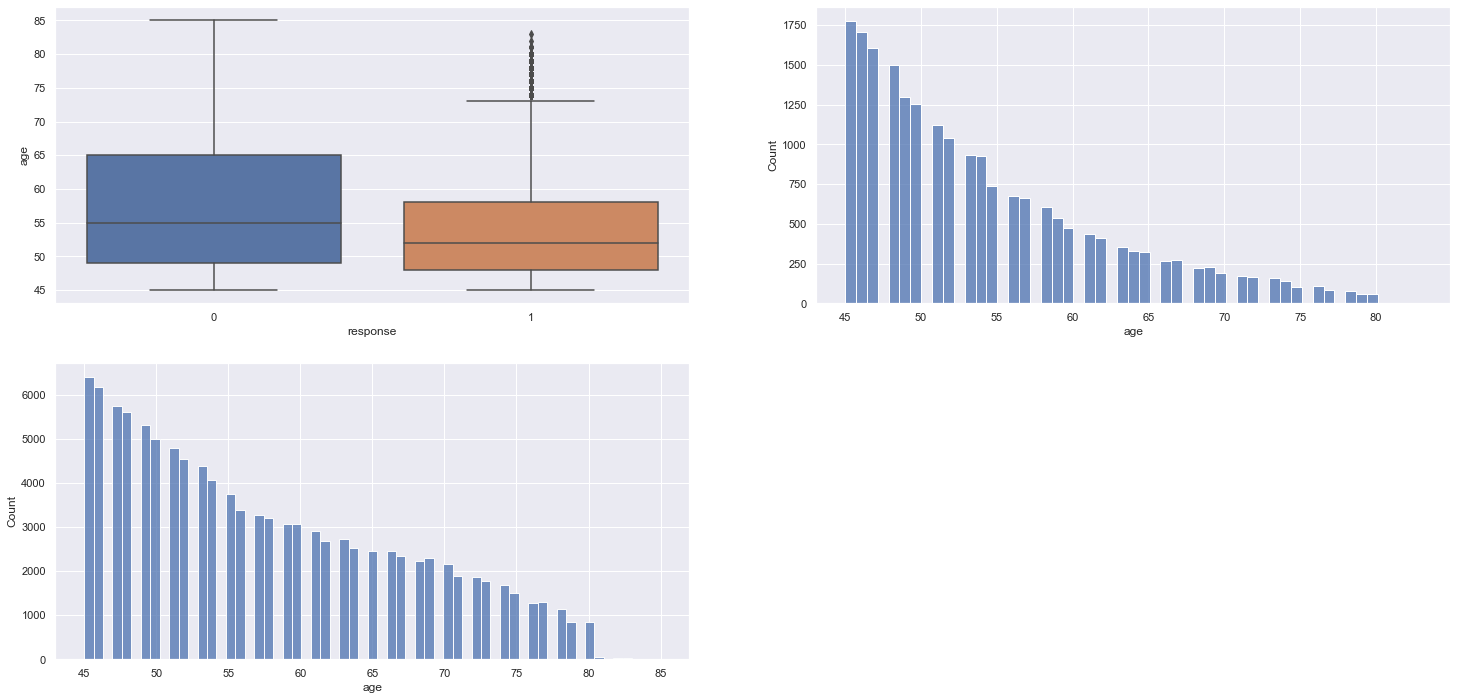

In [444]:
plt.subplot(2, 2, 1)
sns.boxplot( x='response', y='age', data=df4)

plt.subplot(2, 2, 2)
h2 = df4.loc[df4['response'] == 1, 'age']
sns.histplot( h2 )

plt.subplot(2, 2, 3)
h2_aux = df4.loc[df4['response'] == 0, 'age']
sns.histplot( h2_aux )

- Customer over 50 years old are not interested.

### <font color='orange'>  4.2.3 - H3. 80% of Field customers wouldn't be interested on the car insurance.
<font color='blue'>    - The data are not clear to get insights.

<AxesSubplot:xlabel='region_code', ylabel='id'>

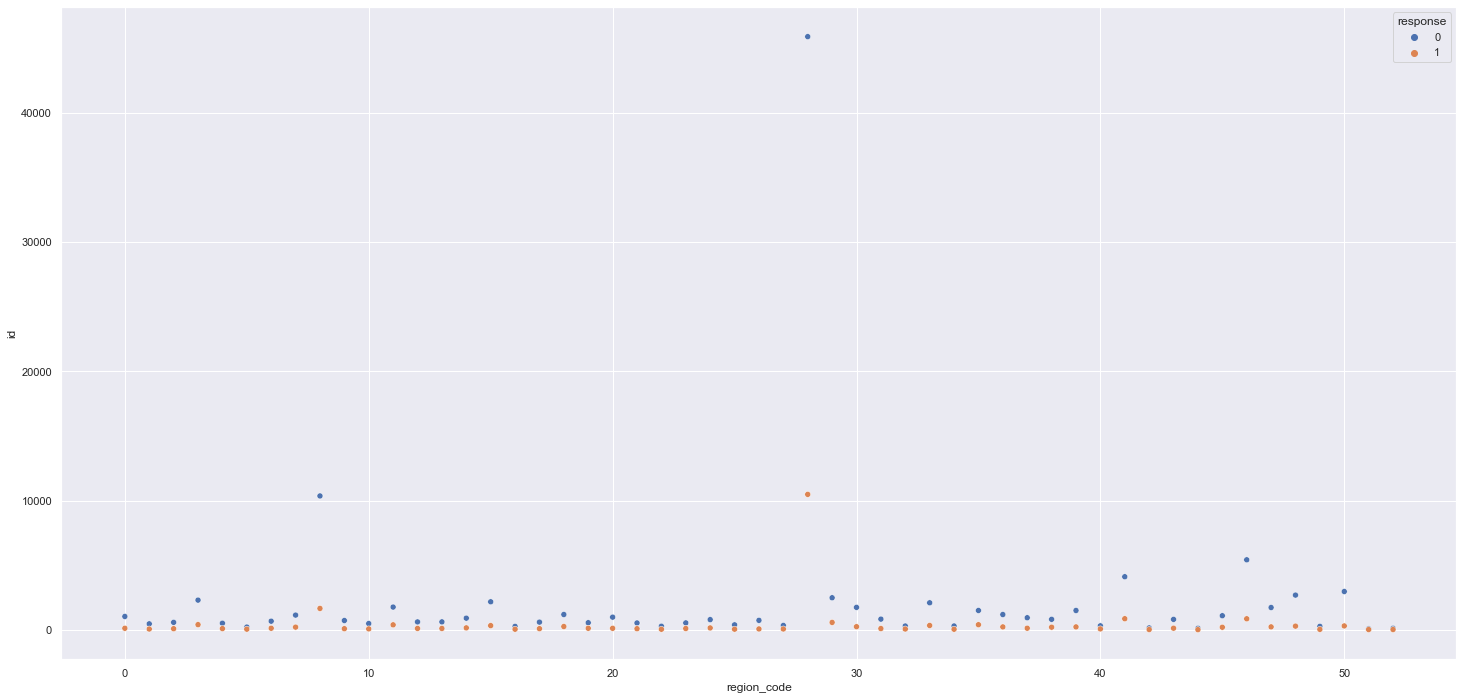

In [445]:
h3 = df4[['id', 'region_code', 'response']].groupby( ['region_code', 'response'] ).count().reset_index() 
sns.scatterplot(x='region_code', y='id', hue='response', data=h3)

In [446]:
h3_aux = df4[['region_code', 'response']].value_counts().reset_index()
h3_aux.head()

,region_code,response,0
0,28,0,45911
1,28,1,10479
2,8,0,10358
3,46,0,5415
4,41,0,4105


- There is only one code of interested customers.

### <font color='orange'>  4.2.4- H4. Policy Sales
<font color='blue'>   The data are not clear to get insights.   

<AxesSubplot:xlabel='response', ylabel='policy_sales_channel'>

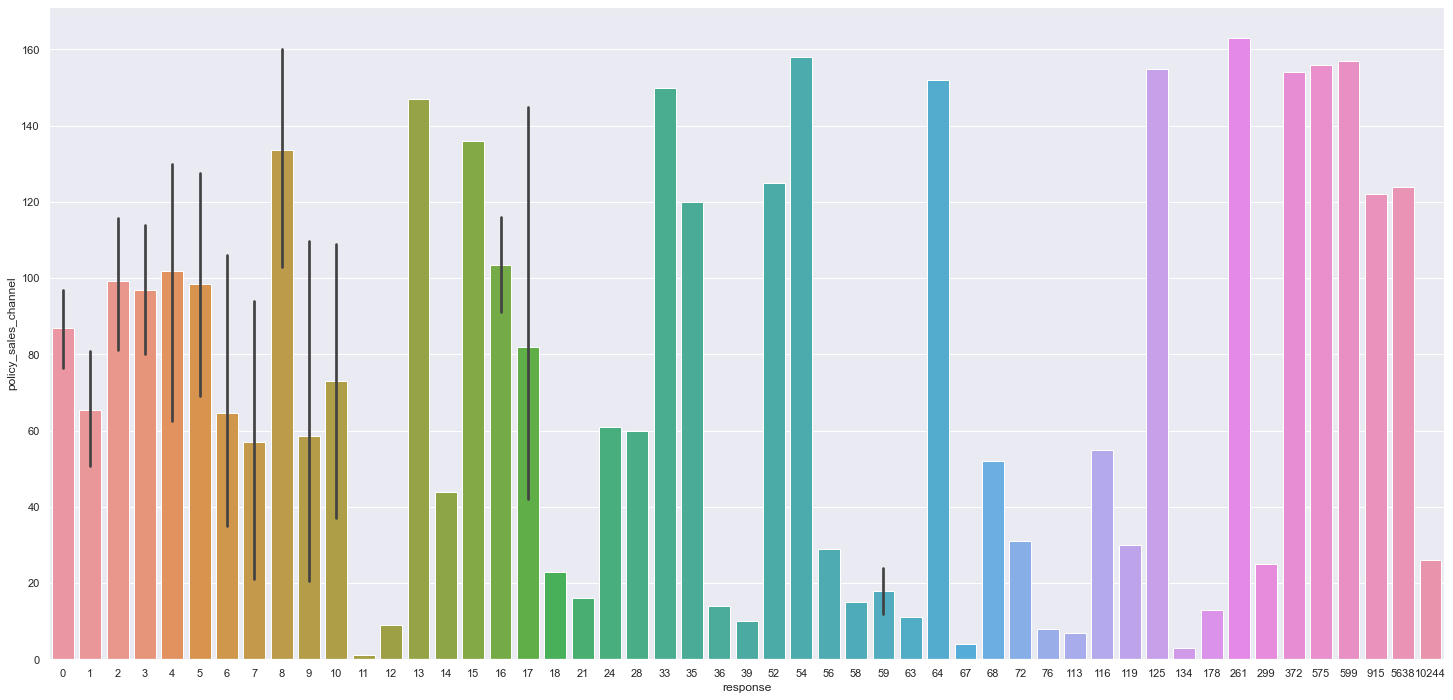

In [447]:
h4 = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot( x='response', y='policy_sales_channel', data= h4)

### <font color='orange'>  4.2.5 - H5. 30% of customers who has driver license would be insterested on the car insurance.
<font color='red'> False    

<AxesSubplot:xlabel='response', ylabel='driving_license'>

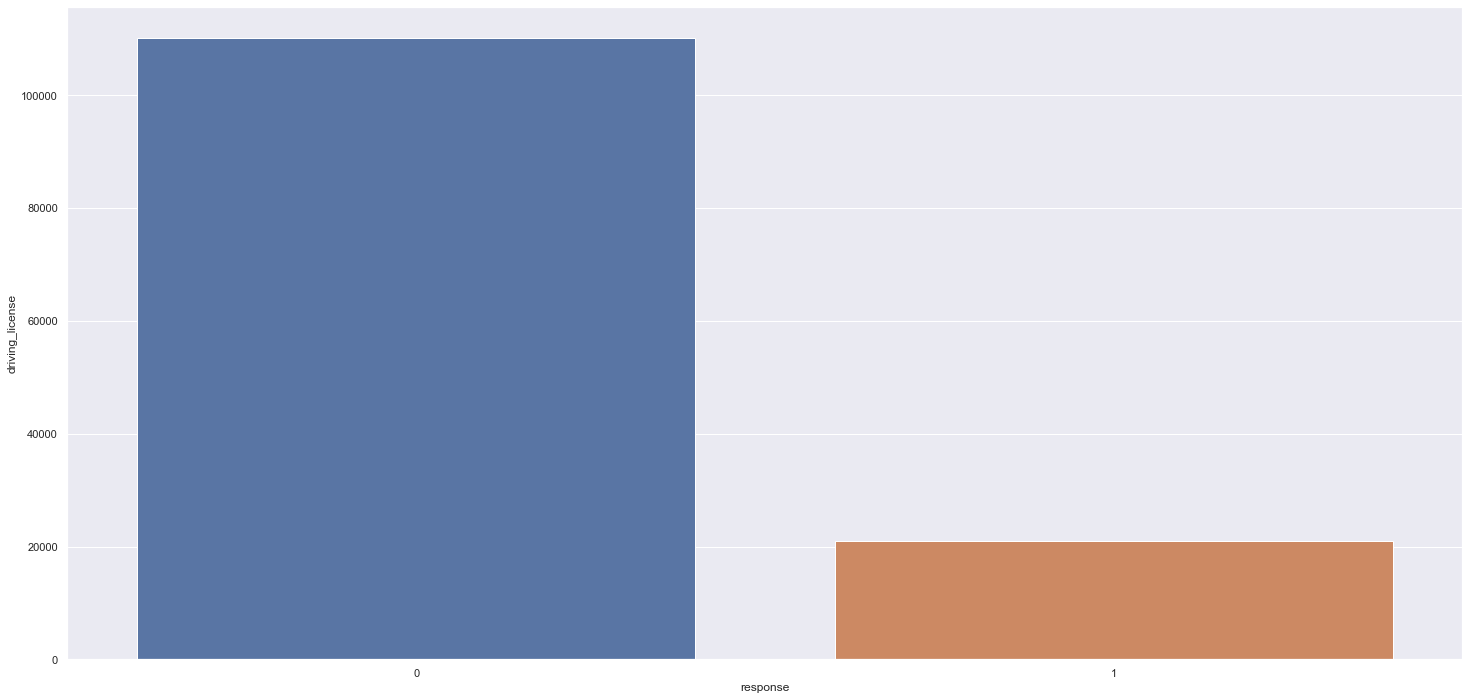

In [448]:
h5 = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
sns.barplot( x='response', y='driving_license', data=h5 )

In [449]:
h5.head()

,response,driving_license
0,0,110160
1,1,21009


In [450]:
h5['driving_license_perc'] = h5['driving_license'] / h5['driving_license'].sum()
h5.head()

,response,driving_license,driving_license_perc
0,0,110160,0.839833
1,1,21009,0.160167


- Only 16% of custumer who has drivers license are interested.
- Most of customers doesn't have drivers license.

### <font color='orange'>  4.2.6 - H6. Customers who has cars less than one year are insterested on the car insurance.
<font color='red'>    False

<AxesSubplot:xlabel='vehicle_age', ylabel='response'>

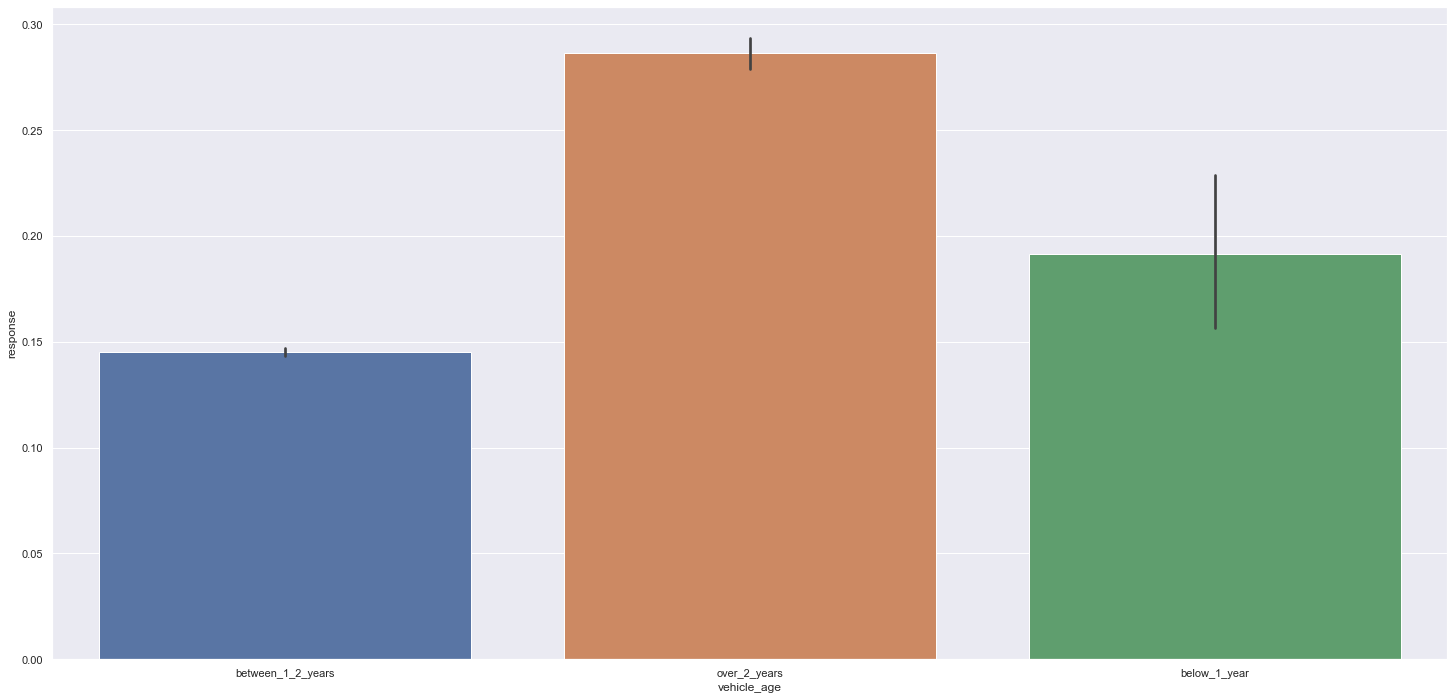

In [451]:
sns.barplot(x='vehicle_age', y='response', data=df4)

/Users/adriele/opt/anaconda3/envs/env_pa004/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vehicle_age', ylabel='count'>

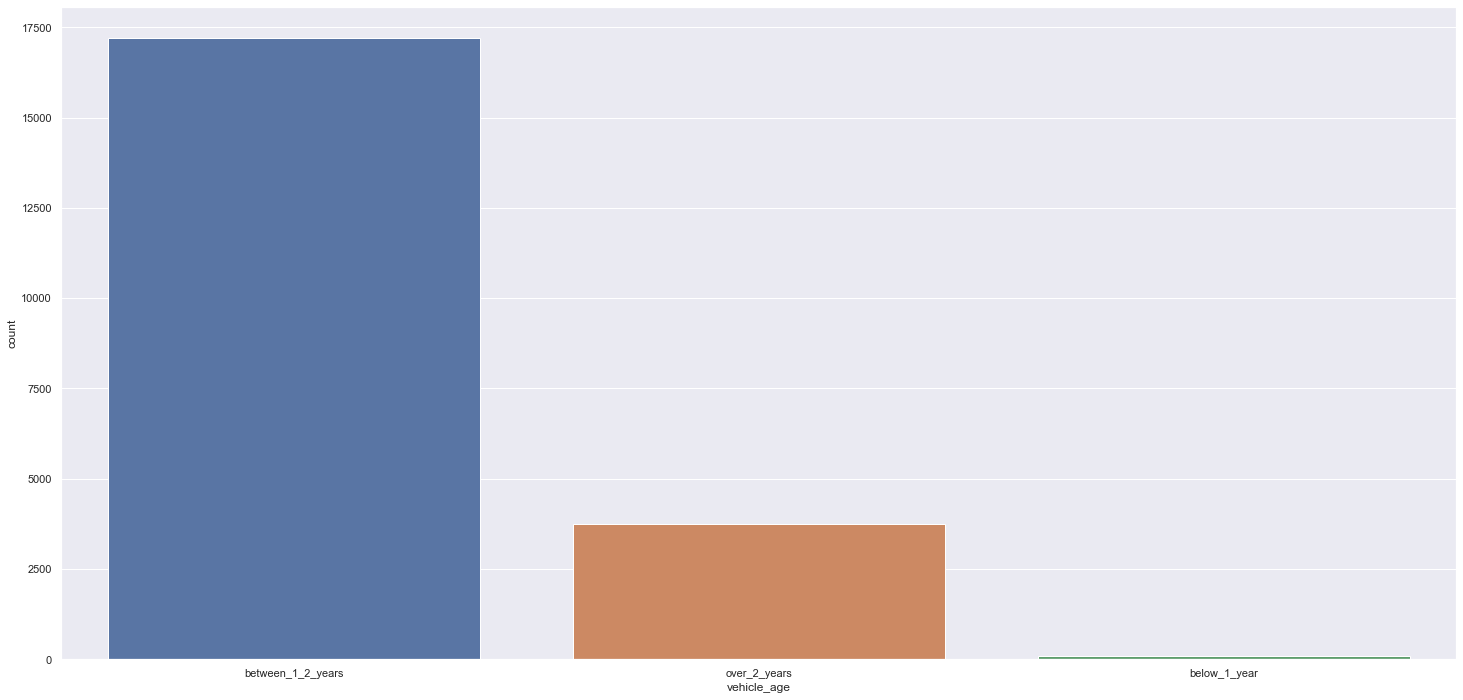

In [452]:

h = df4.loc[df4['response'] == 1, 'vehicle_age']
sns.countplot(h)

In [453]:
h6 = df4[['vehicle_age', 'response']].value_counts( normalize=True ).reset_index()
h6

,vehicle_age,response,0
0,between_1_2_years,0,0.766643
1,between_1_2_years,1,0.130385
2,over_2_years,0,0.070869
3,over_2_years,1,0.028428
4,below_1_year,0,0.002971
5,below_1_year,1,0.000705


- Bellow 1 year = 0.07% of customer interested.
- Between 1 and 2 yars = 13% of customer interested.
- Over years = 2.80% of customer interested.

### <font color='orange'>  4.2.7 - H7. Feature Study - Vehicle Demage
<font color='blue'>   There are no data to get insights.   

<AxesSubplot:xlabel='response', ylabel='vehicle_damage'>

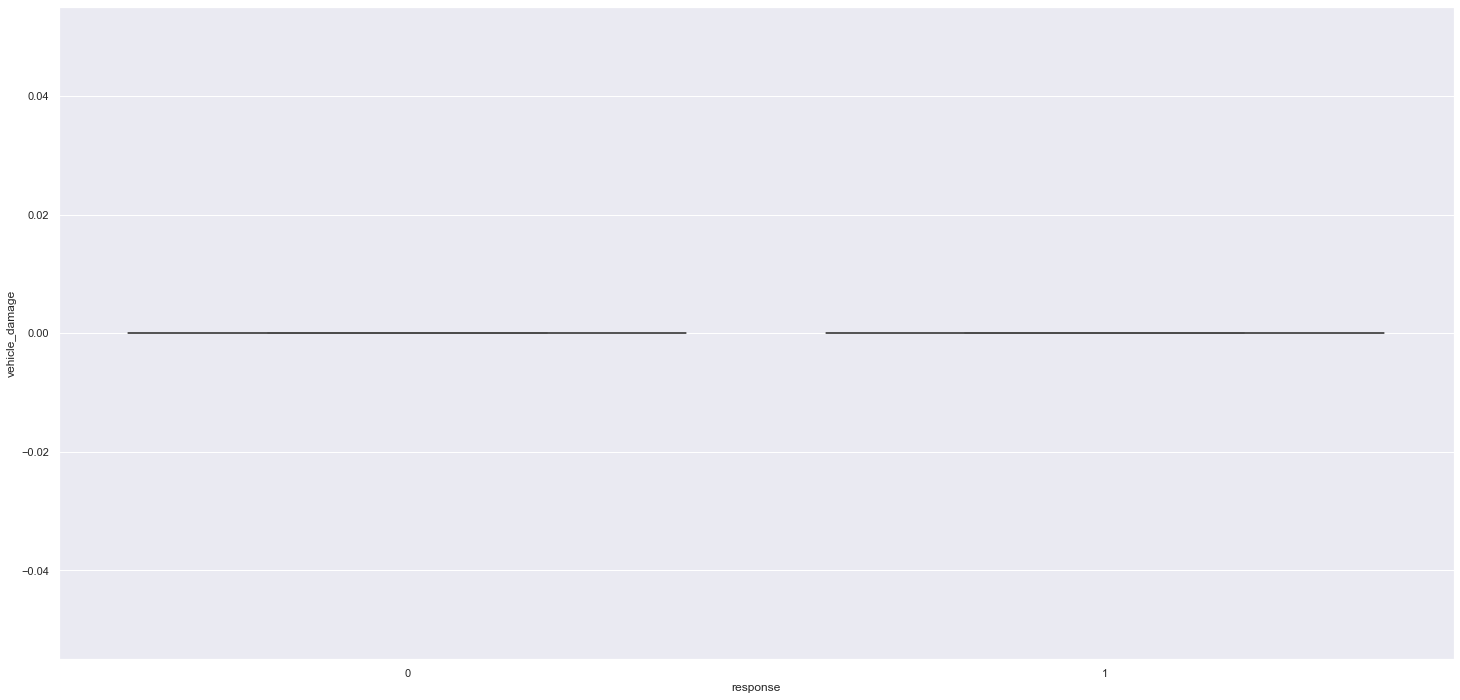

In [454]:
sns.boxplot( x='response', y='vehicle_damage', data=df4)

In [457]:
h = df4[['vehicle_damage', 'response']].value_counts( normalize=True ).reset_index()


In [458]:
#h5 = df4[['vehicle_damage', 'response']].groupby('response').sum().reset_index()
#sns.barplot( x='response', y='vehicle_damage', data=h5 )

h['vehicle_damage_perc'] = h['vehicle_damage'] / h['vehicle_damage'].sum()
h.head()

,vehicle_damage,response,0,vehicle_damage_perc
0,0,0,0.840483,NaN
1,0,1,0.159517,NaN


<AxesSubplot:xlabel='vehicle_damage', ylabel='age'>

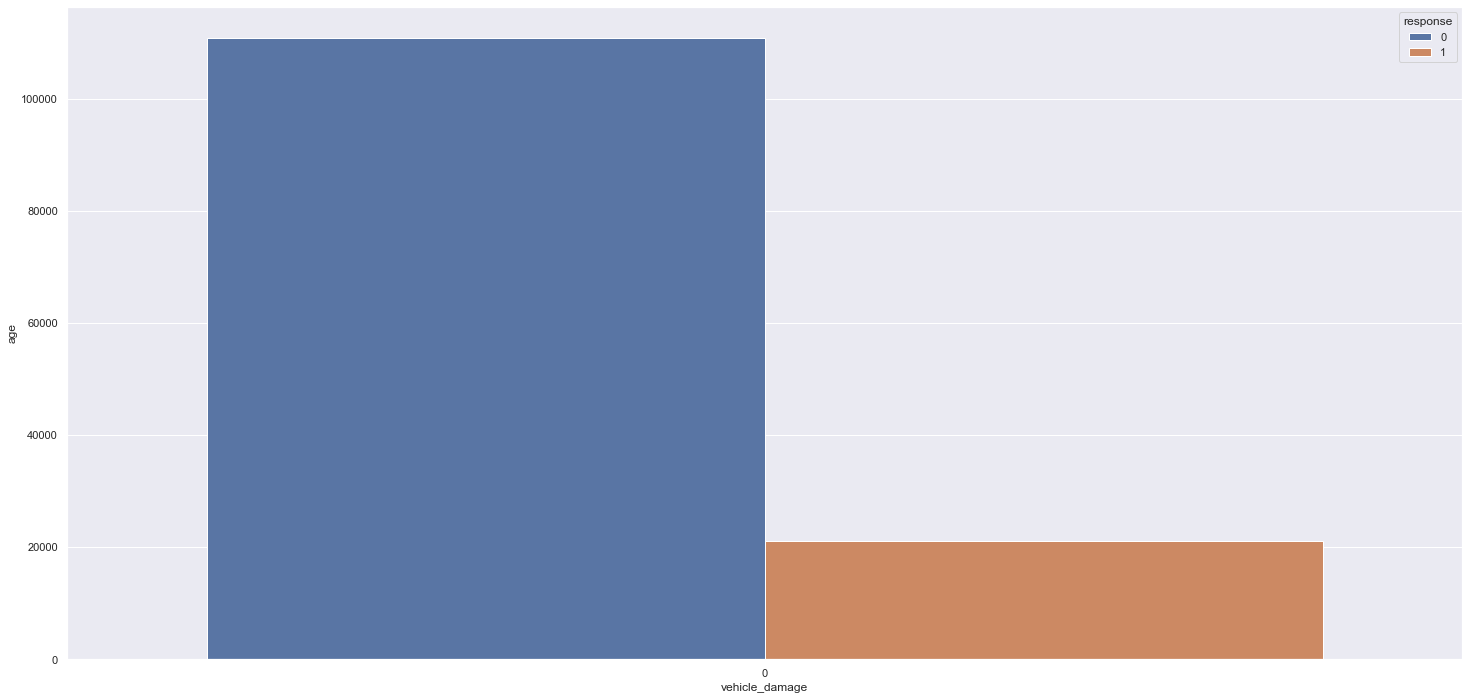

In [459]:
h = df4[['age', 'vehicle_damage', 'response']].groupby( ['vehicle_damage', 'response'] ).count().reset_index() 
sns.barplot(x='vehicle_damage', y='age', hue='response', data=h)

### <font color='orange'>  4.2.8 - H8. 80% of customers who had a previously insurance wouldn't be interested on the car insurance.
<font color='blue'>    True - More than 80% are not interested.

In [460]:
h8 = pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis=1)
h8.head()

response,0,1
previously_insured,,
0,0.768037,0.231963
1,0.999178,0.000822


- Only 0.23% of Customers who had a previously Insurance are interested.
- Only 0.00082% of Customers didn't have a previously Insurance are interested.

<AxesSubplot:xlabel='response', ylabel='previously_insured'>

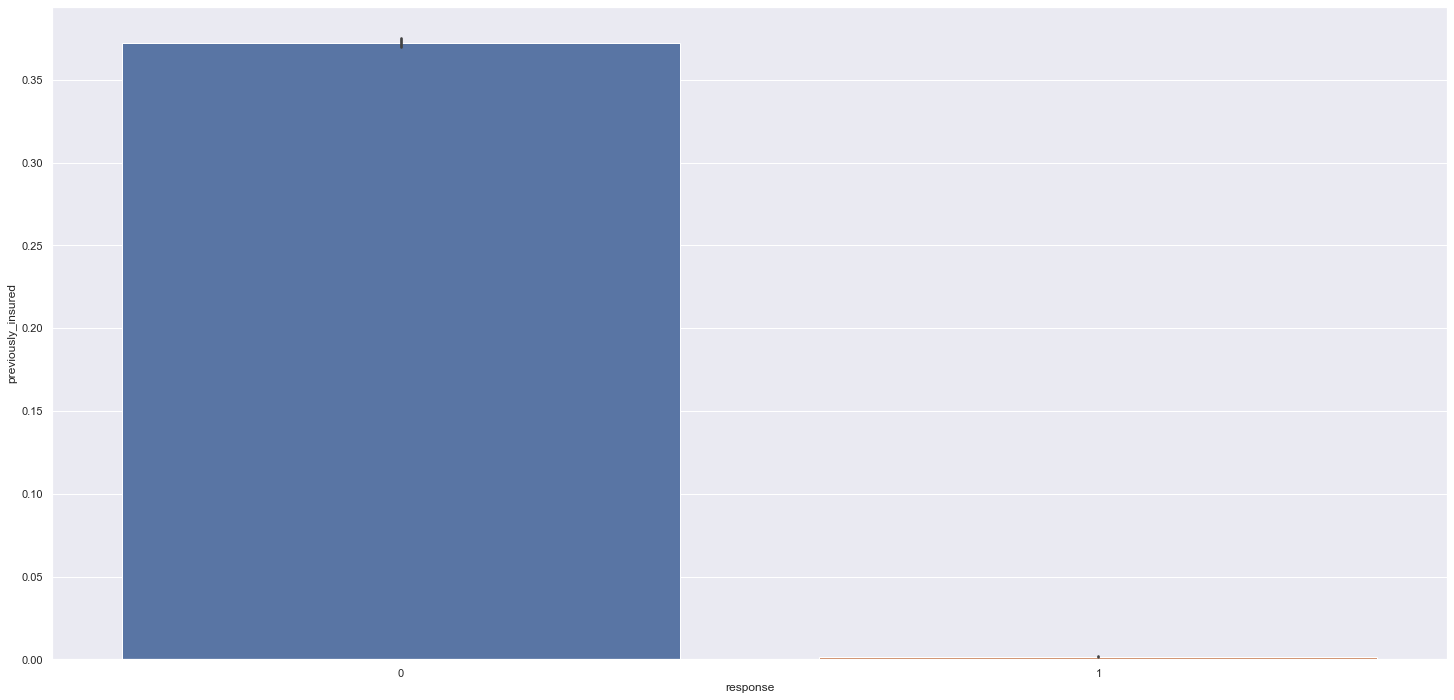

In [466]:
sns.barplot(x='response', y='previously_insured', data=df4)

### <font color='orange'>  4.2.9 - H9. Customers that paid for annually premmiun less than 40.000 would be insterested on the car insurance.
    
<font color='green'> True

In [467]:
df3['annual_premium'].max()


540165

In [468]:
df3['annual_premium'].min()

2630

<AxesSubplot:xlabel='response', ylabel='annual_premium'>

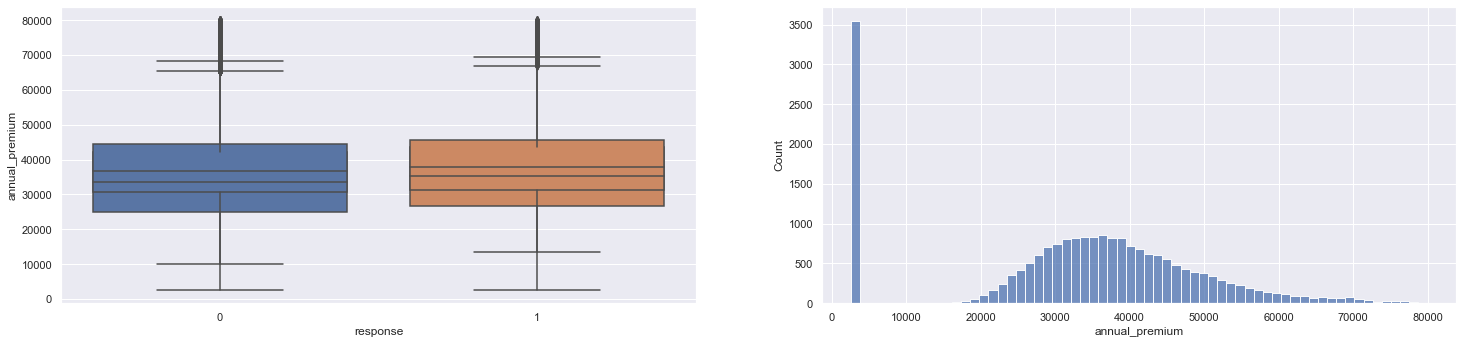

In [469]:

plt.subplot(2, 2, 1)
h9 = df4[df4['annual_premium'] < 80000]
sns.boxplot( x='response', y='annual_premium', data=h9 )

plt.subplot(2, 2, 2)
h9_aux = h9.loc[h9['response'] == 1, 'annual_premium' ]
sns.histplot(h9_aux )

plt.subplot(2, 2, 1)
h9 = df4[(df4['annual_premium'] > 2630) & (df4['annual_premium'] < 80000)]
sns.boxplot( x='response', y='annual_premium', data=h9 )

<AxesSubplot:xlabel='annual_premium', ylabel='Count'>

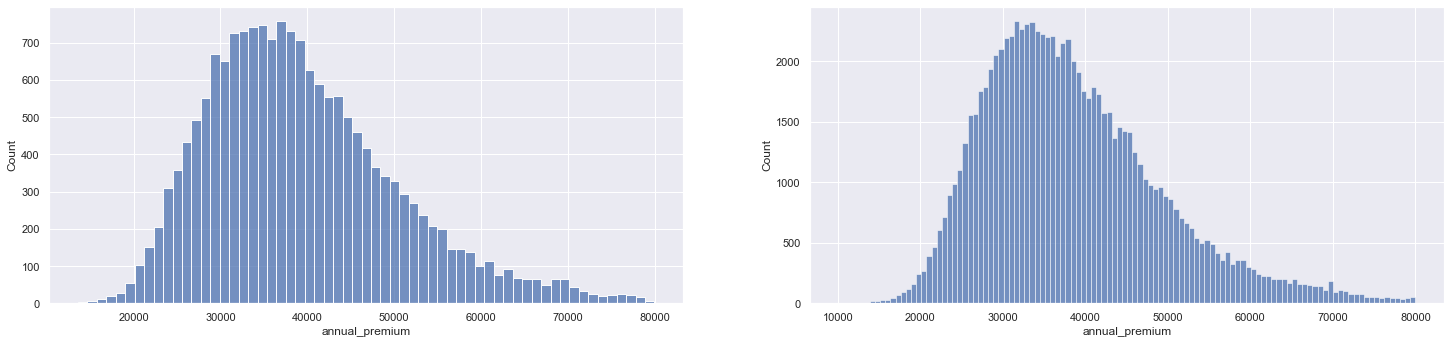

In [470]:
plt.subplot(2, 2, 1)
h9_aux1 = df4[(df4['annual_premium'] > 2630) & (df4['annual_premium'] < 80000)]
h9_aux2 = h9_aux1.loc[h9['response'] == 1, 'annual_premium' ]                                                                                          
sns.histplot( h9_aux2 )

plt.subplot(2, 2, 2)
h9_aux1 = df4[(df4['annual_premium'] > 2630) & (df4['annual_premium'] < 80000)]
h9_aux2 = h9_aux1.loc[h9['response'] == 0, 'annual_premium' ]                                                                                          
sns.histplot( h9_aux2 )

- The most interested Customere are who paid between 30,000 and 40,000.

### <font color='orange'>  4.2.10 - H10. Customers up to 120 days of association on Health Insurance would be insterested on the car insurance.
<font color='blue'> Not possible to valide the Hypothesis.  

<AxesSubplot:xlabel='vintage', ylabel='Count'>

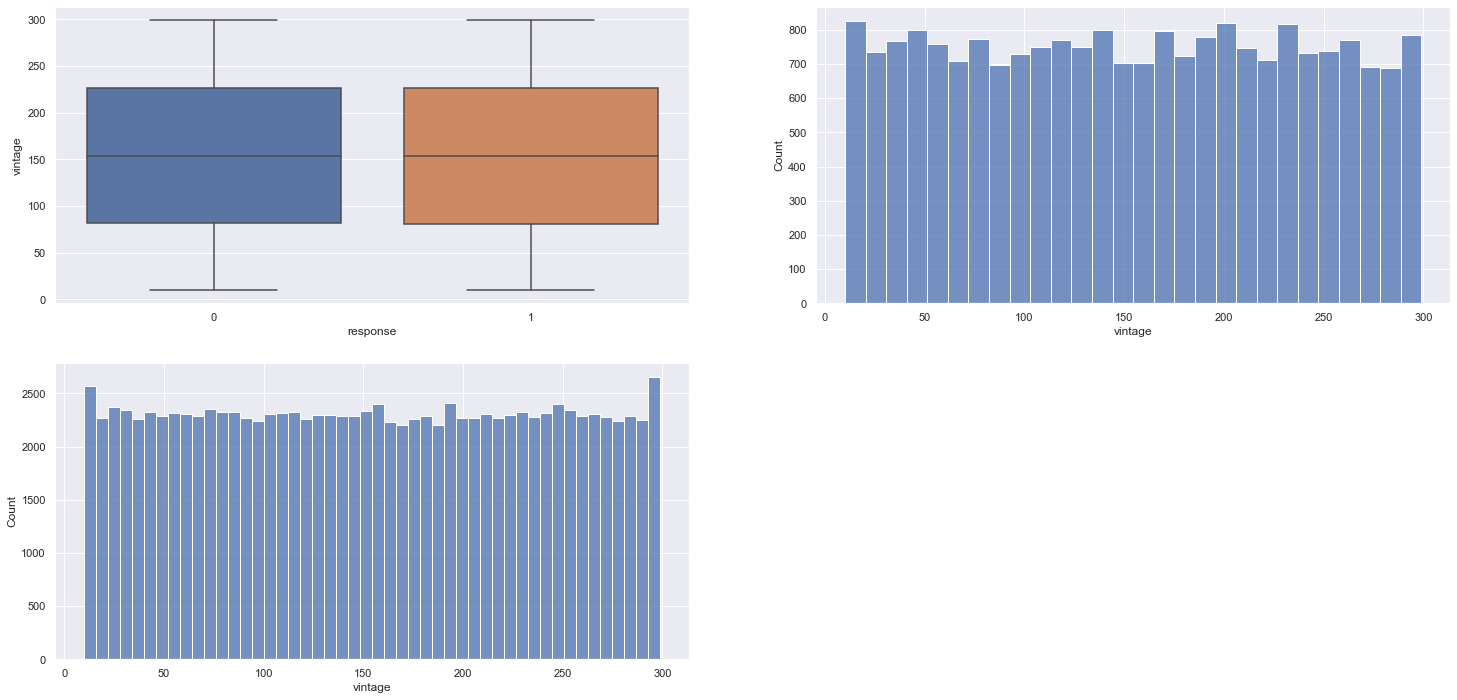

In [471]:
plt.subplot(2, 2, 1)
sns.boxplot( x='response', y='vintage', data=df4)

plt.subplot(2, 2, 2)
h10 = df4.loc[df4['response'] == 1, 'vintage']
sns.histplot( h10 )

plt.subplot(2, 2, 3)
h10 = df4.loc[df4['response'] == 0, 'vintage']
sns.histplot( h10 )

- The number of customers who would buy the insurance is shown to be the same as those who wouldn't buy it either.

## 4.3 Hypothesis Resume


In [472]:
tab = [[ 'Hipothesys', 'Conclusion'],
       [ 'H1', 'False'],
       [ 'H2', 'False'],
       [ 'H3', '-', '-'],
       [ 'H4', '-', '-'],
       [ 'H5', 'False'],
       [ 'H6', 'False'], 
       [ 'H7', '-', '-'],
       [ 'H8', 'True'],
       [ 'H9', 'True'],
       [ 'H10', '-', '-']
      ]

print (tabulate (tab, headers = 'firstrow'))

Hipothesys    Conclusion
------------  ------------
H1            False
H2            False
H3            -
H4            -
H5            False
H6            False
H7            -
H8            True
H9            True
H10           -


## 4.4 Multivariate Analysis

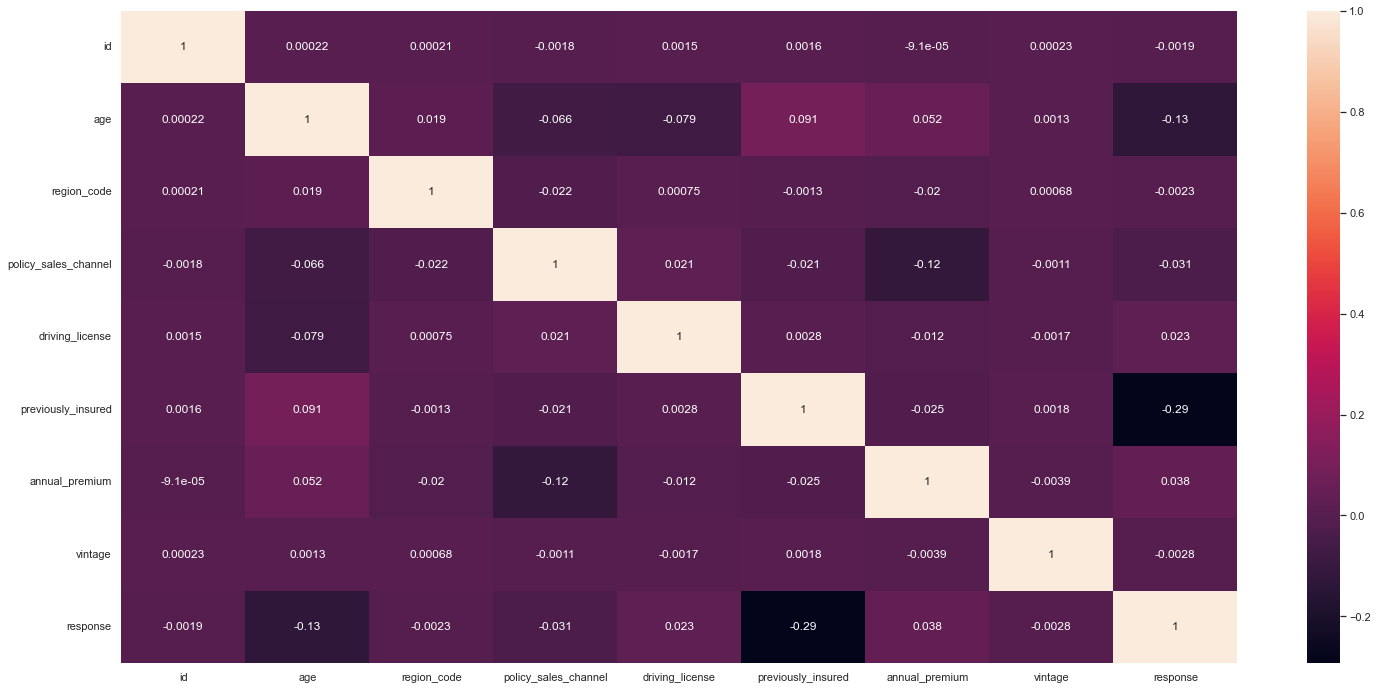

In [473]:
correlation = num_attributes.corr (method = 'pearson')
sns.heatmap (correlation, annot = True);

# 5.0 Data Preparation

In [474]:
df5 = df4.copy()

In [475]:
x = df4.drop( 'response', axis=1 )
y = df4['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split( x, y, test_size=0.20 )
df5 = pd.concat( [x_train, y_train], axis=1 )

In [476]:
x_validation.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage
107708,107708,Male,54,49,26,1,between_1_2_years,0,0,23413,56
18666,18666,Female,78,28,122,1,between_1_2_years,0,1,37193,207
123138,123138,Male,67,50,25,1,between_1_2_years,0,1,40629,199
70103,70103,Male,72,12,124,1,between_1_2_years,0,0,2630,298
49286,49286,Female,47,47,113,1,between_1_2_years,0,1,25566,149


## 5.1 Standarlization

In [477]:
ss = pp.StandardScaler()

# Annual Premium
df5['annual_premium'] = ss.fit_transform( df5[[ 'annual_premium']].values)
pickle.dump (ss, open( '/Users/adriele/Documents/repos/pa004/features/annual_premium_scaler.pkl', 'wb') )


## 5.2 Rescaling

In [478]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform(df5[['age']].values)
pickle.dump (mms_age, open( '/Users/adriele/Documents/repos/pa004/features/age_scaler.pkl', 'wb') )

# Vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values)
pickle.dump (mms_vintage, open( '/Users/adriele/Documents/repos/pa004/features/vintage_scaler.pkl', 'wb') )

## 5.3 Encolding

In [479]:
# Region Code
target_encode_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )
pickle.dump( target_encode_region_code, open( '/Users/adriele/Documents/repos/pa004/features/target_encode_region_code_scaler.pkl', 'wb') )

# gender
target_encode_gender = df5.groupby('gender')['response'].mean()
df5.loc[:, 'gender'] = df5['gender'].map( target_encode_gender )
pickle.dump( target_encode_gender, open( '/Users/adriele/Documents/repos/pa004/features/target_encode_gender_scaler.pkl', 'wb') )

# vehicle_age
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

# policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )
pickle.dump( fe_policy_sales_channel, open( '/Users/adriele/Documents/repos/pa004/features/fe_policy_sales_channel_scaler.pkl', 'wb') )

## 5.4 Validation Preparation

In [480]:
#gender
x_validation.loc[:, 'gender'] = x_validation['gender'].map( target_encode_gender )

# region code
x_validation.loc[:, 'region_code'] = df5['region_code'].map( target_encode_region_code )

# age
x_validation.loc[:, 'age'] = mms_age.transform(x_validation[['age']].values)

# vehicle_age
x_validation = pd.get_dummies( x_validation, prefix='vehicle_age', columns=['vehicle_age'] )

# Annual Premium
x_validation.loc[:, 'annual_premium'] = ss.transform( x_validation[[ 'annual_premium']].values)

# policy_sales_channel
x_validation.loc[:, 'policy_sales_channel'] = x_validation['policy_sales_channel'].map( fe_policy_sales_channel )

# Vintage
x_validation.loc[:, 'vintage'] = mms_vintage.transform( x_validation[['vintage']].values)

# fill NA
x_validation = x_validation.fillna( 0 )


In [481]:
x_validation.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_damage,previously_insured,annual_premium,vintage,vehicle_age_below_1_year,vehicle_age_between_1_2_years,vehicle_age_over_2_years
107708,107708,0.165870,0.225,0.0,0.413630,1,0,0,-0.463138,0.159170,0,1,0
18666,18666,0.148535,0.825,0.0,0.048675,1,0,1,0.256307,0.681661,0,1,0
123138,123138,0.165870,0.550,0.0,0.011065,1,0,1,0.435698,0.653979,0,1,0
70103,70103,0.165870,0.675,0.0,0.294492,1,0,0,-1.548205,0.996540,0,1,0
49286,49286,0.148535,0.050,0.0,0.000549,1,0,1,-0.350731,0.480969,0,1,0


# 6.0 Feature Selection

In [482]:
df6 = df5.copy()

## 6.1 Boruta

In [259]:
# # training and test dataset for boruta
# x_train_n = df6.drop (['id', 'response'], axis=1).values
# y_train_n = y_train.values.ravel ()

# # model definition
# et = en.ExtraTreesClassifier(n_jobs=-1)
# # Defining boruta
# boruta = BorutaPy( et, n_estimators='auto', verbose=2, random_state=42 ).fit (x_train_n, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	11
I

In [260]:
cols_selected = boruta.support_.tolist()

# Best features
x_train_fs = df6.drop (['id', 'response'], axis=1)
cols_selected_boruta = x_train_fs.iloc [:, cols_selected].columns.to_list()

# Not selected boruta
cols_not_selected_boruta = list( np.setdiff1d( x_train_fs.columns, cols_selected_boruta ) )

In [261]:
cols_selected

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

## 6.2 Feature Definition

In [483]:
# model definition
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1)

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
forest.fit( x_train_n, y_train_n)

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking:
                         feature  importance
0                        vintage    0.310034
0                 annual_premium    0.281176
0                            age    0.143686
0                    region_code    0.114265
0             previously_insured    0.079678
0           policy_sales_channel    0.054007
0                         gender    0.005551
0       vehicle_age_over_2_years    0.005374
0  vehicle_age_between_1_2_years    0.004756
0                driving_license    0.000865
0       vehicle_age_below_1_year    0.000606
0                 vehicle_damage    0.000000


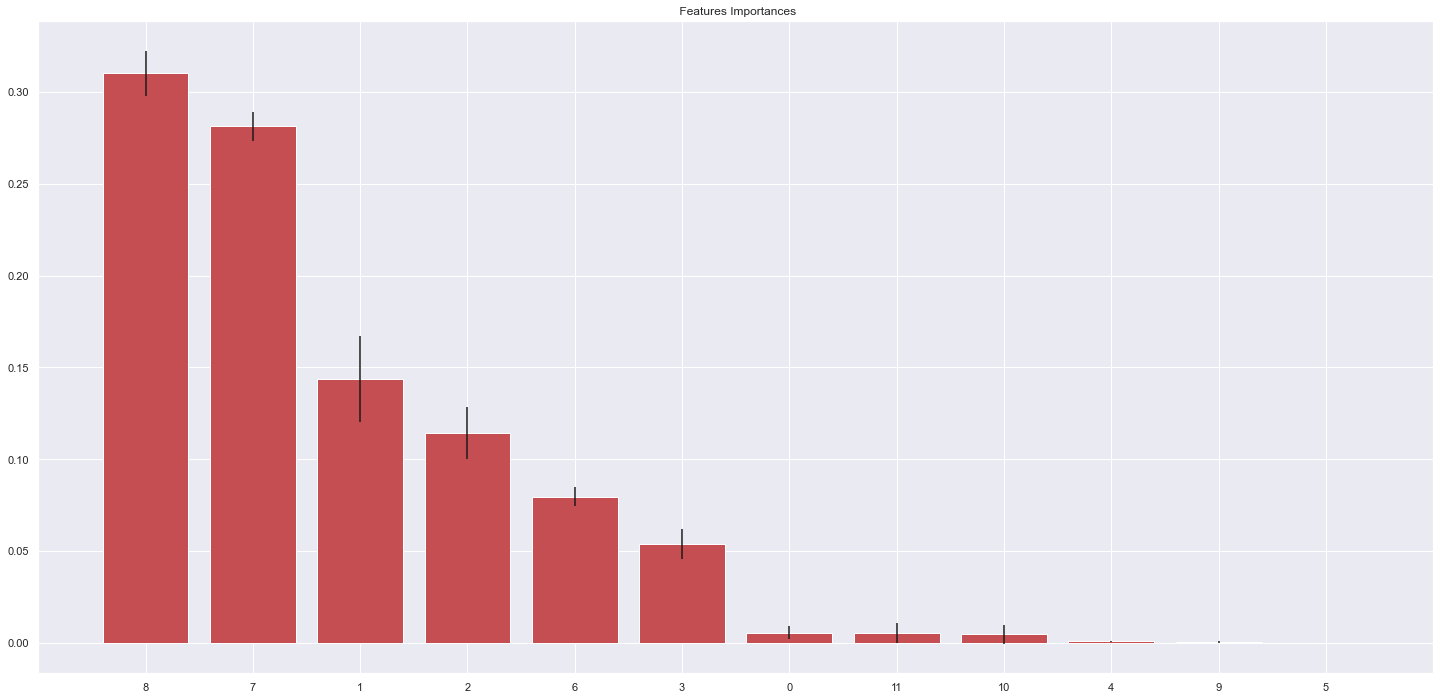

In [484]:
importances = forest.feature_importances_
std         = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices     = np.argsort(importances) [::-1]

# Print Features Rankings
print( 'Feature Ranking:')
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance' : j}, index=[0])
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )   


# Plot the impurity based importances of the forest
plt.figure()
plt.title(" Features Importances")
plt.bar( range( x_train_n.shape[1] ), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks( range( x_train_n.shape[1] ), indices )
plt.xlim( [-1, x_train_n.shape[1]] )
plt.show()    

# 7.0 Machine Learning

In [485]:
#cols_selected = ['vintage','annual_premium', 'age', 'region_code', 'previously_insured', 'policy_sales_channel', 'gender'] 

cols_selected = ['vintage','annual_premium', 'age', 'region_code','vehicle_damage',
                 'previously_insured', 'policy_sales_channel', 'gender'] 

x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected]
y_val = y_validation


## 7.1 KNN

In [486]:
# model definition
knn_model = nh.KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model prediction - the power of model; generalization
yhat_knn = knn_model.predict_proba( x_val)



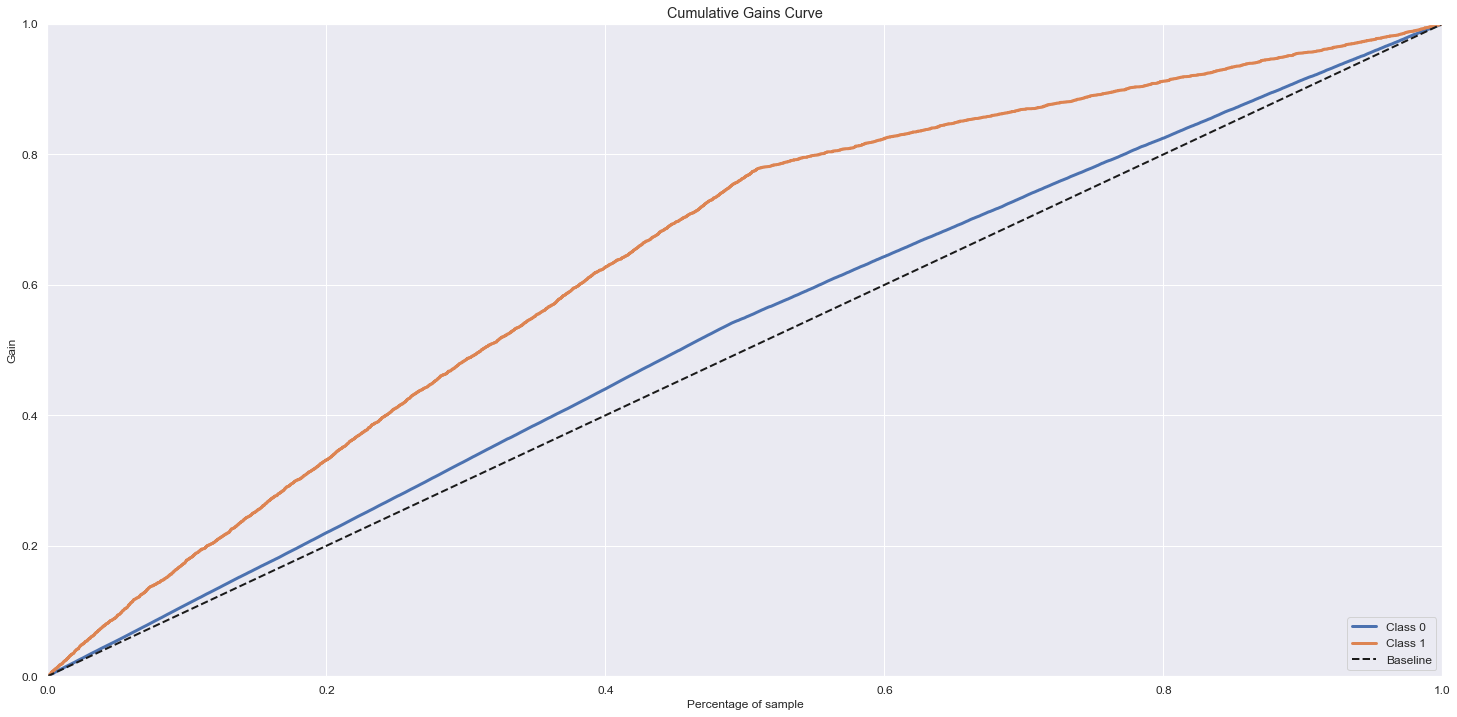

In [487]:
# Acumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

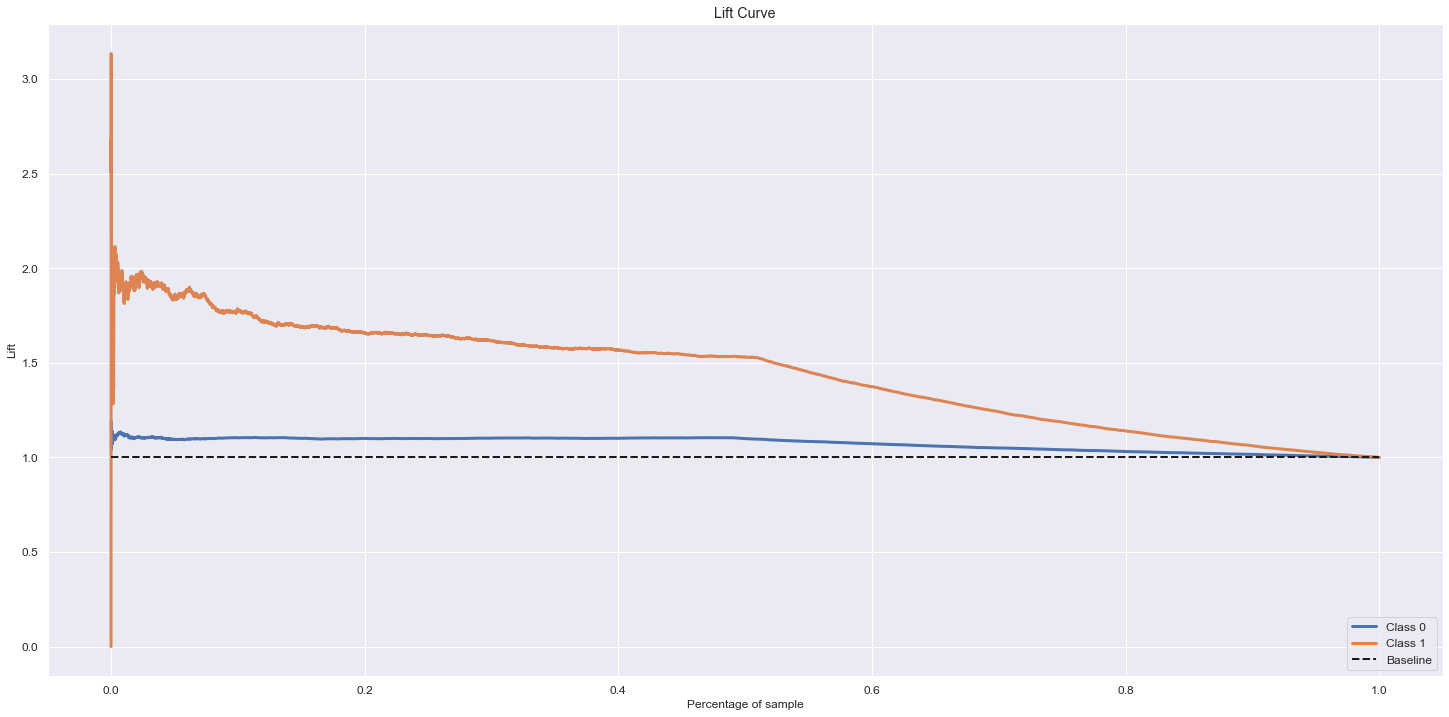

In [488]:
# Acumulative Gain
skplt.metrics.plot_lift_curve( y_val, yhat_knn );

## 7.2 Regression Logistic

In [489]:
# model definition
lr_model = lm.LogisticRegression( random_state=42 )

# model training
lr_model.fit( x_train, y_train )

# model prediction - the power of model; generalization
yhat_lr = lr_model.predict_proba( x_val)



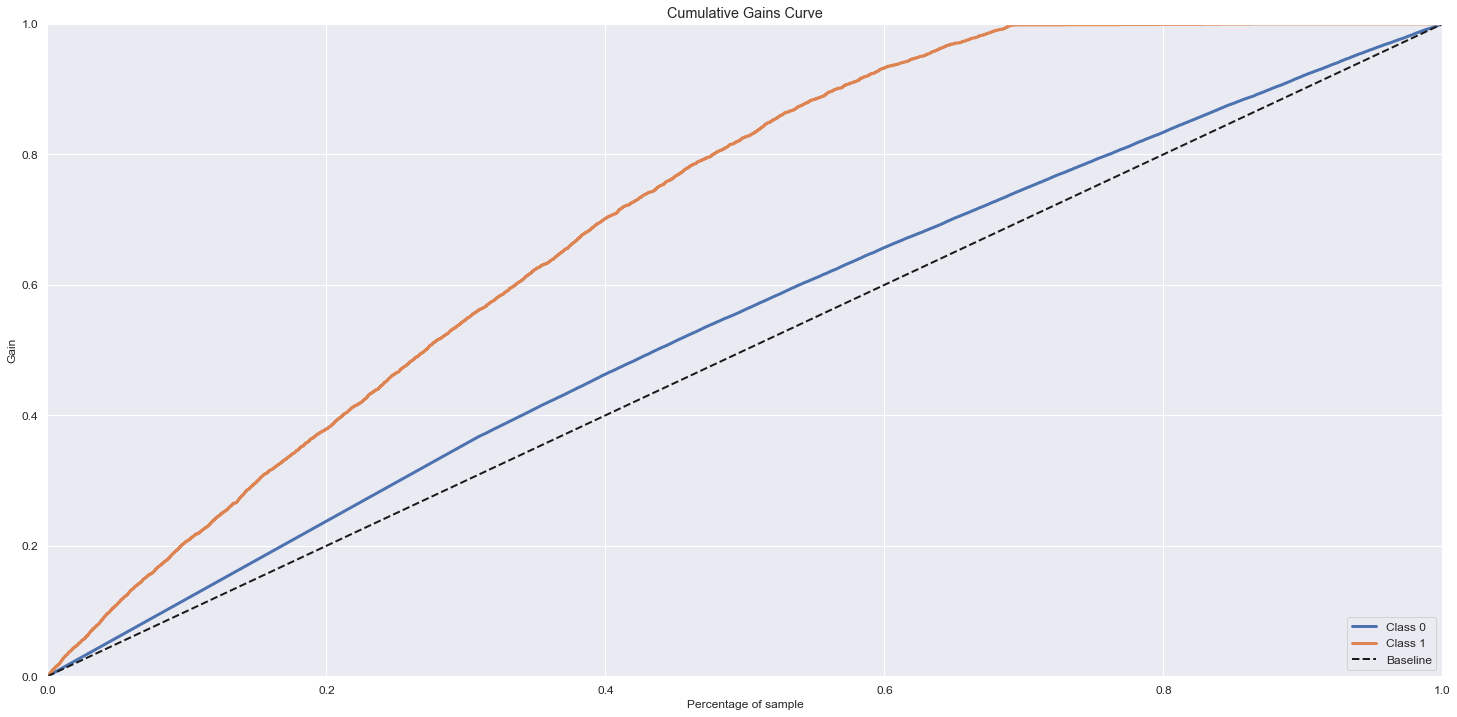

In [490]:
# Acumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );

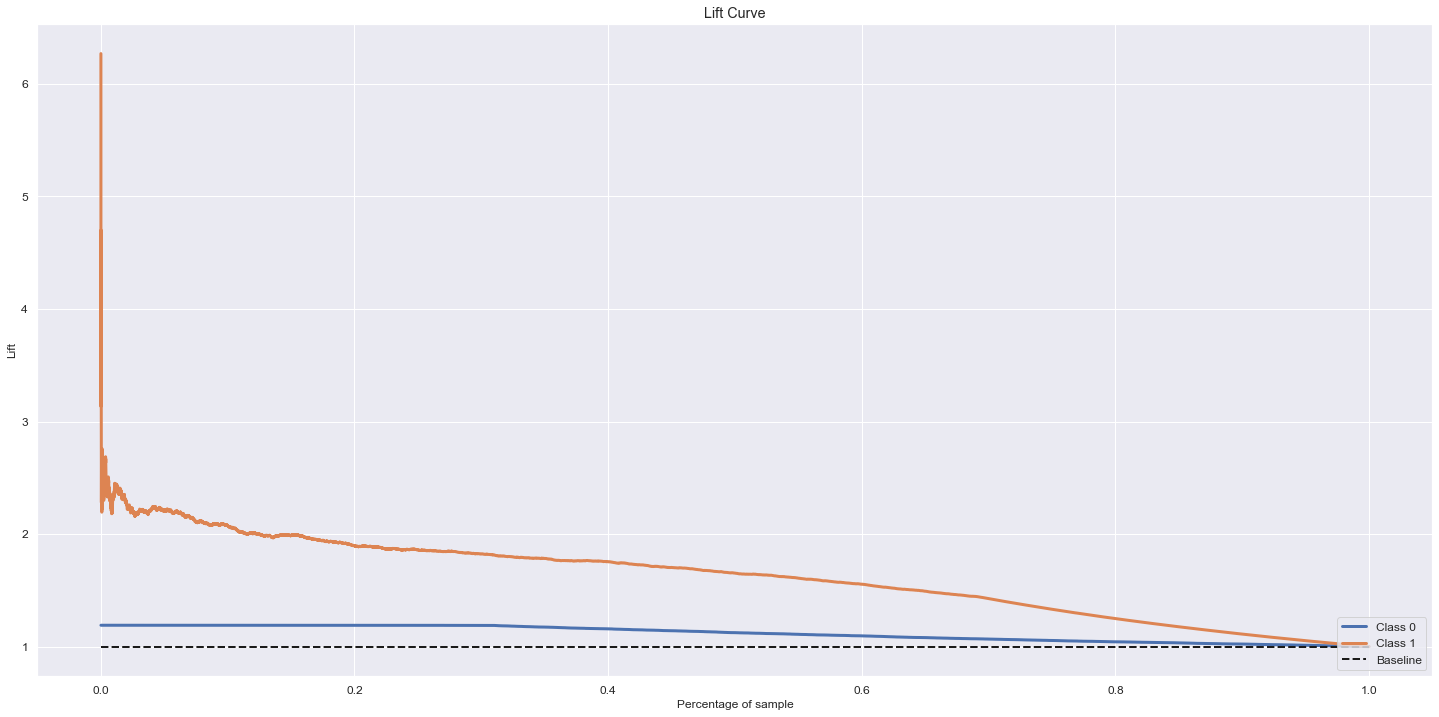

In [491]:
# Acumulative Gain
skplt.metrics.plot_lift_curve( y_val, yhat_lr );

## 7.3 Extra Trees

In [492]:
# Model Definition
et= en.ExtraTreesClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# model fit
et.fit(x_train, y_train)

# model predict
yhat_et = et.predict_proba( x_val )






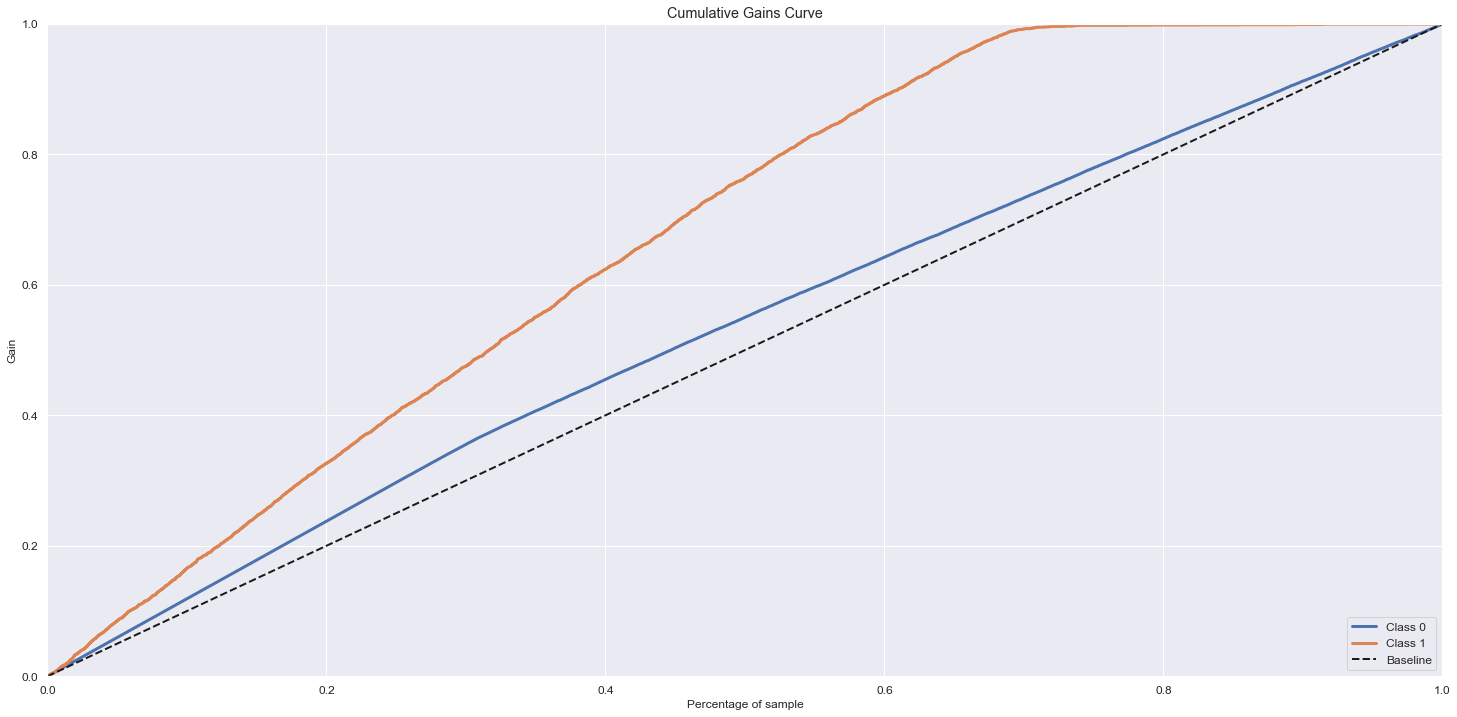

In [493]:
# Acumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_et );

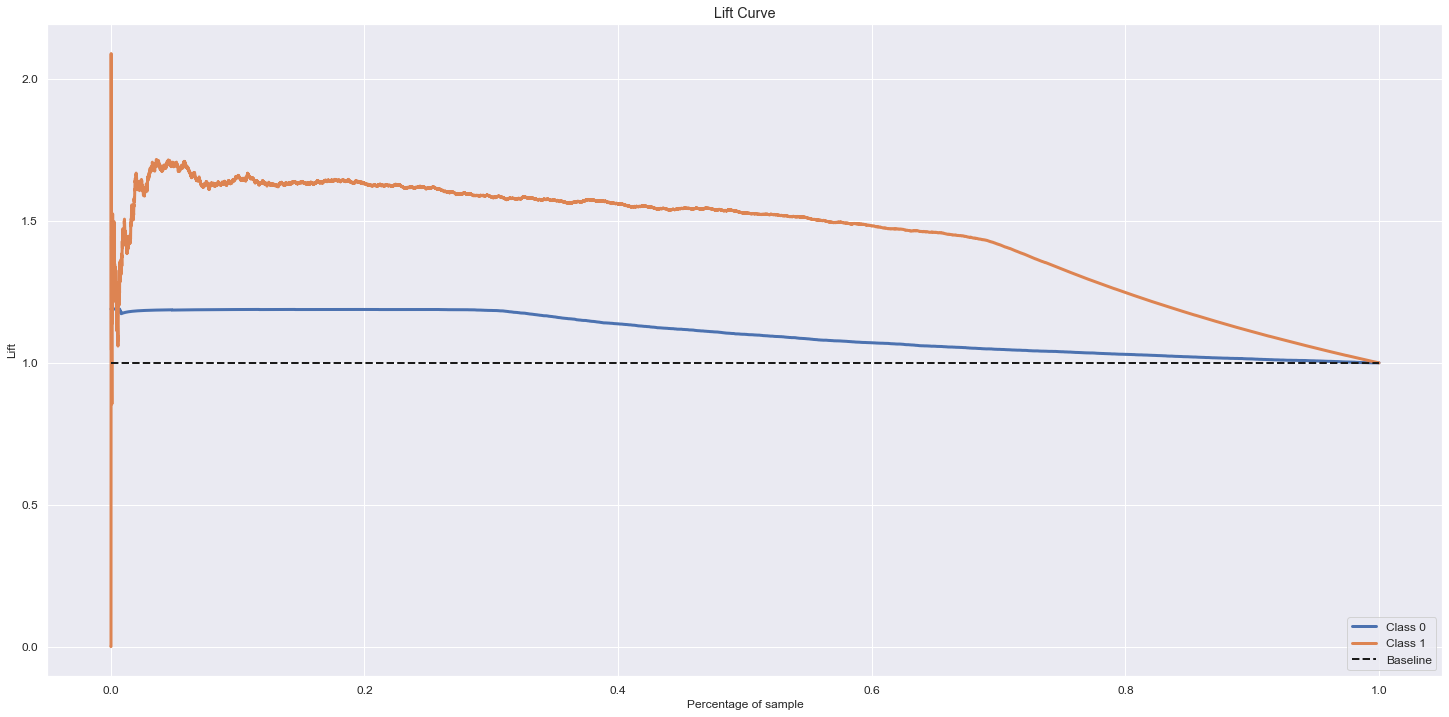

In [494]:
# Acumulative Gain
skplt.metrics.plot_lift_curve( y_val, yhat_et );

## 7.4 Random Forest

In [495]:
# Model Definition
rf = en.RandomForestClassifier( n_estimators=1000, n_jobs=-1, random_state=42 )

# model fit
rf.fit(x_train, y_train)

# model predict
yhat_rf = et.predict_proba( x_val )


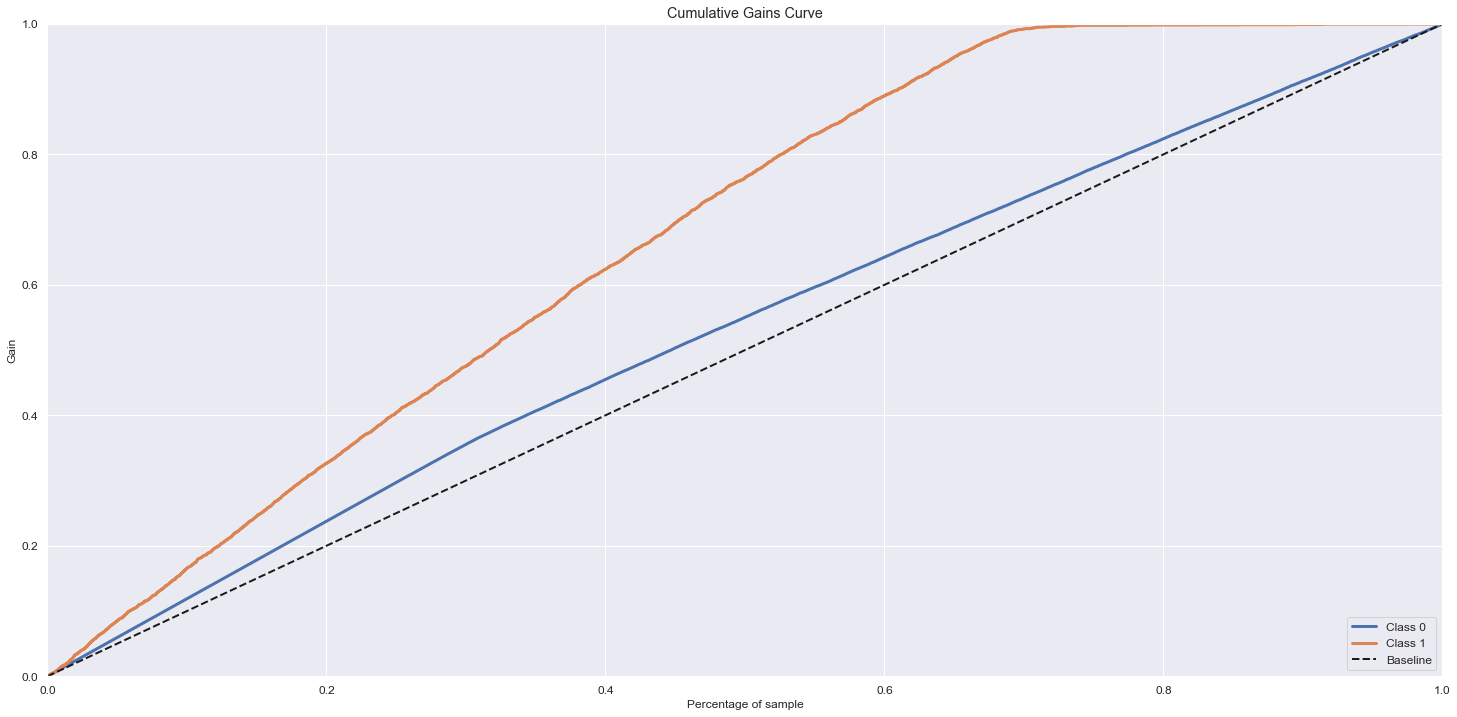

In [496]:
# Acumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_rf );

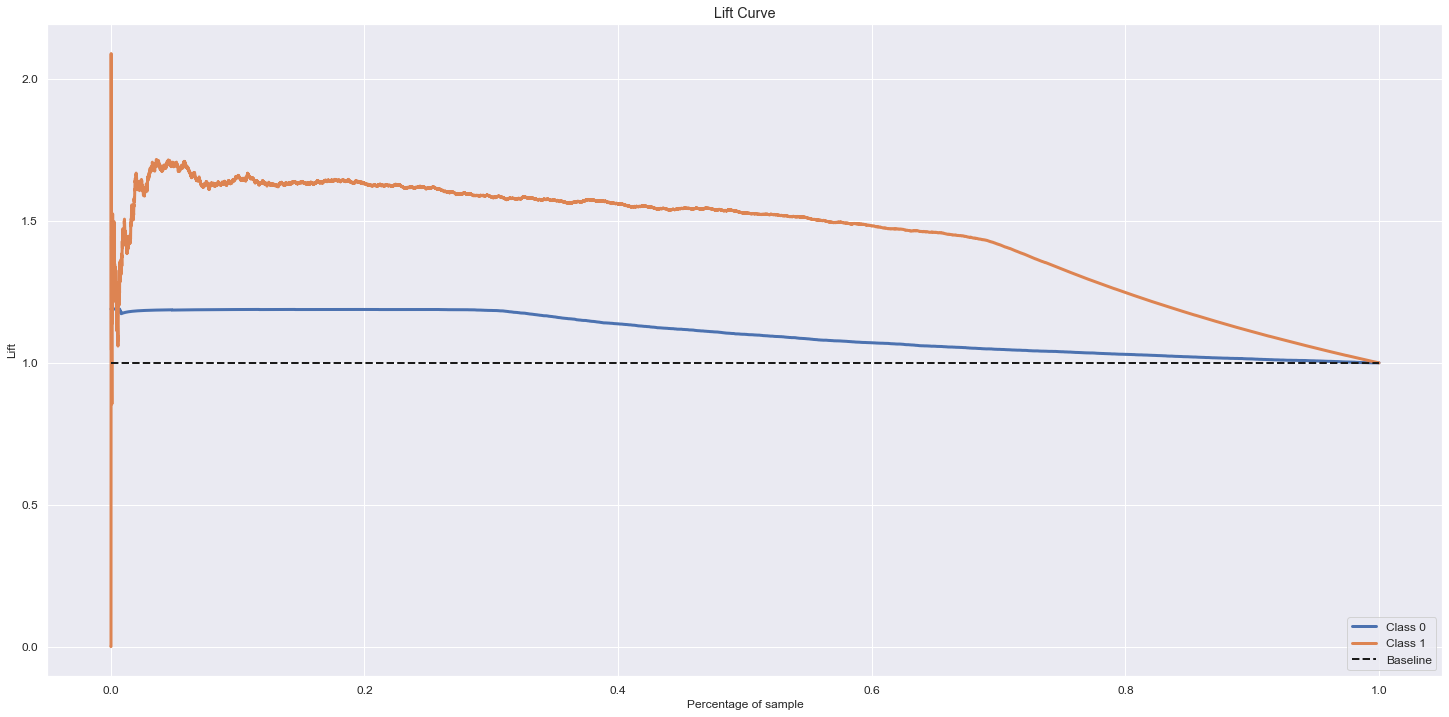

In [497]:
# Acumulative Gain
skplt.metrics.plot_lift_curve( y_val, yhat_rf );

# 8.0 Model Performance

In [498]:
def precision_at_k( data, k=2000 ):
    # Reset Index
    data = data.reset_index( drop=True )

    # Create rankings order
    data['ranking'] = data.index + 1

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k' ]

In [499]:
def recall_at_k( data, k=2000 ):
    # Reset Index
    data = data.reset_index( drop=True )

    # Create rankings order
    data['ranking'] = data.index + 1

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k' ]

In [500]:
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:, 1].tolist()

# sorte Clients by propensity score
df8 = df8.sort_values( 'score', ascending=False)

# Compute Precision at k
precision_at_50 = precision_at_k( df8, k=50 )
print( 'Precision at k: {}'.format( precision_at_50))
      
# Compute Precision at k
precision_at_50 = precision_at_k( df8, k=50 )
print( 'Recall at k: {}'.format( precision_at_50) )     

Precision at k: 0.29411764705882354
Recall at k: 0.29411764705882354


In [501]:
y_true = np.array([0, 1, 2, 2])
y_score = np.array([ [0.5, 0.2, 0.2],
                     [0.3, 0.4, 0.2],
                     [0.2, 0.4, 0.3],
                     [0.7, 0.2, 0.1]])

top_k_accuracy_score(y_true, y_score, k=2 )

0.75

In [513]:
y_true  = np.array( [1, 0, 1, 1, 0, 1, 0, 0] )
y_score = np.array([])

## 8.1 Manually curve cumulative

<AxesSubplot:xlabel='base_cum_perc', ylabel='real_cum_perc'>

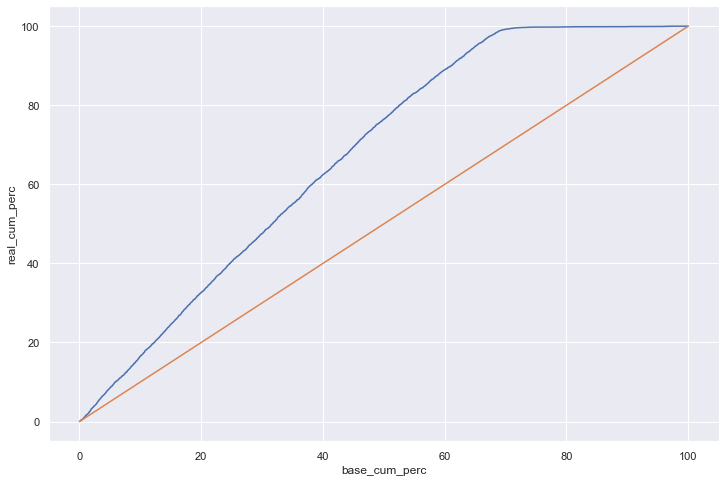

In [514]:
results = pd.DataFrame()
results['prediction'] = yhat_et[:,1].tolist()
results['real'] = y_val.tolist()

# Ordering by prediction
results = results.sort_values( 'prediction', ascending=False )

# Percentage of intereset - Propensity Score
results['real_cum'] = results['real'].cumsum()
results['real_cum_perc'] = 100*results['real_cum']/results['real'].sum()

# Percentage of Base - Clients
results['base'] = range( 1, len( results ) + 1 ) 
results['base_cum_perc'] = 100*results['base']/len ( results )

# Baseline Model
results['baseline'] = results['base_cum_perc']

plt.figure( figsize=(12, 8) )
sns.lineplot( x='base_cum_perc', y='real_cum_perc', data=results )
sns.lineplot( x='base_cum_perc', y='baseline', data=results )

## 8.2 Manually Lift Curve

<AxesSubplot:xlabel='base_cum_perc', ylabel='lift'>

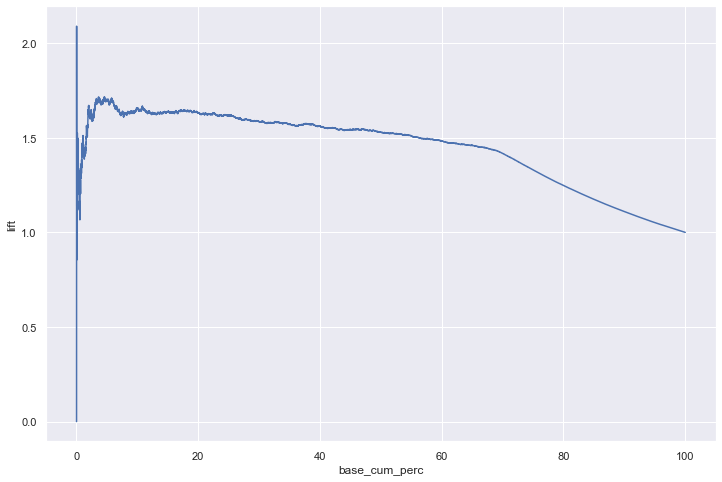

In [517]:
results = pd.DataFrame()
results['prediction'] = yhat_et[:,1].tolist()
results['real'] = y_val.tolist()

# Ordering by prediction
results = results.sort_values( 'prediction', ascending=False )

# Percentage of intereset - Propensity Score
results['real_cum'] = results['real'].cumsum()
results['real_cum_perc'] = 100*results['real_cum']/results['real'].sum()

# Percentage of Base - Clients
results['base'] = range( 1, len( results ) + 1 ) 
results['base_cum_perc'] = 100*results['base']/len ( results )

# Baseline Model
results['baseline'] = results['base_cum_perc']

# Lift Calculation
results['lift'] = results['real_cum_perc'] / results['base_cum_perc']

plt.figure( figsize=(12, 8) )
sns.lineplot( x='base_cum_perc', y='lift', data=results )

## 8.3 Manually ROI Curve

In [506]:
results = pd.DataFrame()
results['prediction'] = yhat_et[:,1].tolist()
results['real'] = y_val.tolist()

# Ordering by prediction
results = results.sort_values( 'prediction', ascending=False )

# Percentage of intereset - Propensity Score
results['real_cum'] = results['real'].cumsum()
results['real_cum_perc'] = 100*results['real_cum']/results['real'].sum()

# Percentage of Base - Clients
results['base'] = range( 1, len( results ) + 1 ) 
results['base_cum_perc'] = 100*results['base']/len ( results )

# Baseline Model
results['baseline'] = results['base_cum_perc']

# Lift Calculation
results['lift'] = results['real_cum_perc'] / results['base_cum_perc']


# plt.figure( figsize=(12, 8) )
# sns.lineplot( x='base_cum_perc', y='lift', data=results )

In [553]:

# Compute Bucket
results['bucket'] = results['prediction'].apply( lambda x: 0.9 if x >= 0.90 else
                                                             0.8 if ( x >= 0.80) & ( x <= 0.90) else
                                                             0.7 if ( x >= 0.70) & ( x <= 0.80) else
                                                             0.6 if ( x >= 0.60) & ( x <= 0.70) else
                                                             0.5 if ( x >= 0.50) & ( x <= 0.60) else
                                                             0.4 if ( x >= 0.40) & ( x <= 0.50) else
                                                             0.3 if ( x >= 0.30) & ( x <= 0.40) else
                                                             0.2 if ( x >= 0.20) & ( x <= 0.30) else
                                                             0.1 if ( x >= 0.10) & ( x <= 0.20) else 0.01 )


# Aggreging Clients among Buckets
df = results[['prediction', 'bucket']].groupby( 'bucket' ).agg( {'min', 'count'} ).reset_index()
df.columns = df.columns.droplevel()
df.columns = ['index', 'propensity_score', 'clients']

# Compute Revenue and Cost
df['gross_revenue'] = 100 * df['clients'] * df['propensity_score']
df['cost'] = 20 * df['clients']

df['base'] = df['clients'].sort_values( ascending=True ).cumsum() / df['clients'].sum()

# Revenue
df['revenue'] = df['gross_revenue'] - df['cost']
df = df.sort_values( 'index', ascending=False )
df

,index,propensity_score,clients,gross_revenue,cost,base,revenue
9,0.90,0.905,4,362.0,80,0.000152,282.0
8,0.80,0.806,10,806.0,200,0.000531,606.0
7,0.70,0.700,41,2870.0,820,0.002084,2050.0
6,0.60,0.600,94,5640.0,1880,0.005646,3760.0
5,0.50,0.500,175,8750.0,3500,0.012277,5250.0
4,0.40,0.400,430,17200.0,8600,0.028571,8600.0
3,0.30,0.300,1070,32100.0,21400,0.069117,10700.0
2,0.20,0.200,2452,49040.0,49040,0.162031,0.0
1,0.10,0.100,5806,58060.0,116120,0.382039,-58060.0
0,0.01,0.000,16308,0.0,326160,1.000000,-326160.0


<AxesSubplot:xlabel='base', ylabel='revenue'>

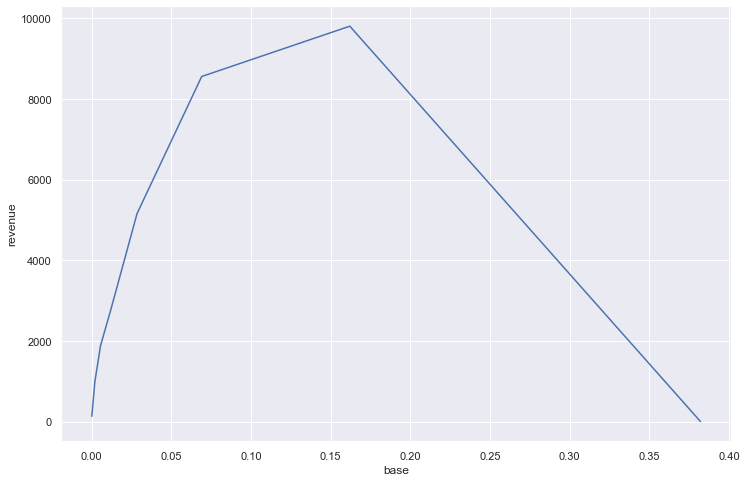

In [525]:
plt.figure( figsize=(12,8) )
aux = df[df['propensity_score'] >= 0.1]
sns.lineplot( x='base', y='revenue', data=aux)

# 9.0 Deploy to production

In [288]:
pickle.dump (lr_model, open( '/Users/adriele/Documents/repos/pa004/model/lr_model.pkl', 'wb') )

## 9.1 Health Insurance Class

In [289]:

import pandas as pd
import numpy as np
import pickle


class HealthInsurance():
    def __init__( self ):
        
        self.annual_premium_scaler            = pickle.load ( open( '/Users/adriele/Documents/repos/pa004/parameter/annual_premium_scaler.pkl', 'rb') )
        self.age_scaler                       = pickle.load ( open( '/Users/adriele/Documents/repos/pa004/features/age_scaler.pkl', 'rb') )
        self.vintage_scaler                   = pickle.load ( open( '/Users/adriele/Documents/repos/pa004/features/vintage_scaler.pkl', 'rb') )
        self.target_encode_region_code_scaler = pickle.load ( open( '/Users/adriele/Documents/repos/pa004/features/target_encode_region_code_scaler.pkl', 'rb') )
        self.target_encode_gender_scaler      = pickle.load ( open( '/Users/adriele/Documents/repos/pa004/features/target_encode_gender_scaler.pkl', 'rb') )
        self.fe_policy_sales_channel_scaler   = pickle.load ( open( '/Users/adriele/Documents/repos/pa004/features/fe_policy_sales_channel_scaler.pkl', 'rb') )

        
    def data_cleaning( self, df1 ): 
        
        # rename columns
        df1.columns = ['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
                       'driving_license', 'vehicle_age', 'vehicle_damage',
                       'previously_insured', 'annual_premium', 'vintage', 'response']
        
        return df1

    def feature_engeneering( self, df2 ):
        
        # Vehicle age
        df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'over_2_years' 
                                                      if x == '> 2 Years' else 'betwenn_1_2_years' 
                                                      if x == '1-2 Year' else 'below_1_year')

        # Vehicle demage
        df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'yes' else 0)
        
        return df2
    
    # =========================================================================================
    
    def data_preparation( self, df5):
        
        # Annual Premium
        df5['annual_premium'] = self.annual_premium_scaler.transform( df5[[ 'annual_premium']].values)
        
        # age
        df5['age'] = self.age_scaler.transform(df5[['age']].values)

        # Vintage
        df5['vintage'] = self.vintage_scaler.transform( df5[['vintage']].values)
        
        # Region Code
        df5.loc[:, 'region_code'] = df5['region_code'].map( self.target_encode_region_code_scaler )
        
        # gender
        df5.loc[:, 'gender'] = df5['gender'].map( self.target_encode_gender_scaler )
        
        # vehicle_age
        df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

        # policy_sales_channel
        df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(  self.fe_policy_sales_channel_scaler  )
        
        
        cols_selected = ['vintage','annual_premium', 'age', 'region_code','vehicle_damage',
                         'previously_insured', 'policy_sales_channel', 'gender'] 
        
        return df5[ cols_selected]
    
    
    def get_prediction( self, model, original_data, test_data):
        
        #prediction
        pred = model.predict( test_data)
        
        # Join pred into original data
        original_data['prediction'] = np.expm1( pred )
        
        return original_data.to_json( orient='records', date_format='iso' )
    
        


        
        

# 9.2 API Handler

In [290]:
import pandas as pd
import numpy as np
import pickle
from flask import Flask, request, Response
from healthinsurance import HealthInsurance

# load model

model = picle.load( open('/Users/adriele/Documents/repos/pa004/model/lr_model.pkl','rb') ) 

# initialized API    
app = Flask ( __name__ )

@app.route( '/healthinsurance/predict', methods=['POST'] )

def health_insurance_predict():
    test_json = request.get_json()
    
    if test_json:  # there is data
        if isinstance( test_json, dict): 
            test_raw = pd.DataFrame( test_json, index=[0] )
        
        else:  # Multiple example
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
        
        
        # Instanting HI class
        pipeline = HealthInsurance ()
        
        # data cleaning
        df1 = pipeline.data_cleaning( test_raw)
        
        #feature engineering
        df2 = pipeline.feature_engineering(df1)
        
        # data preparation
        df3 = pipeline.data_preparation( df2 )
        
        # prediction
        df_response = pipeline.get_prediction( model, test_raw, df3)
        
        return df_response
        
    else:
        return Response( '{}', status=200, mimetype='application/json' )

if __name__  == '__main__':
    app.run( '0.0.0.0', debug=True )

ModuleNotFoundError: No module named 'healthinsurance'

# 9.3 API Test

In [ ]:
import requests


x = df4.drop( 'response', axis=1 )
y = df4['response'].copy()
x_train, x_validation, y_train, y_validation = ms.train_test_split( x, y, test_size=0.20 )

# Load Datase
df_test = x_validation
df_test['response'] = y_validation

df_test = df_test.sample(1000)
df_test.head(10)

In [ ]:
import json
# Convert data frame to json
data = json.dumps( df_test.to_dict( orient='records') )

In [ ]:
# API call
#url = 'http://0.0.0.0:5000/healthinsurance/predict'
url = 'https://pd-health-insurance.herokuapp.com/predict'
header = { 'Content-type':'application/json' }
data = data

r = requests.post( url, data=data, headers=header )
print('Status Code {}'.format( r.status_code) )


In [ ]:
d1 = pd.DataFrame( r.json(), columns=r.json()[0].keys() )
d1.sort_values( 'score', ascending=False ).head()

In [ ]:
# import apivideo
# from apivideo.apis import VideosApi
# from apivideo.exceptions import ApiAuthException

# api_key = "your api key here"

# # Set up the authenticated client
# client = apivideo.AuthenticatedApiClient(api_key)

# # if you rather like to use the sandbox environment:
# client = apivideo.AuthenticatedApiClient(api_key, production=False)
# client.connect()

# videos_api = VideosApi(client)

# # Create the payload with video details 
# video_create_payload = {
#     "title": "Client Video Test",
#     "description": "Client test",
#     "public": False,
#     "tags": ["bunny", "tree"]
# }

# # Create the container for your video and print the response
# response = videos_api.create(video_create_payload)
# print("Video Container", response)

# # Retrieve the video ID, you can upload once to a video ID
# video_id = response["video_id"]

# # Prepare the file you want to upload. Place the file in the same folder as your code.
# file = open("sample-mov-file.mov", "rb")

# # Upload your video. This handles videos of any size. The video must be in the same folder as your code. 
# # If you want to upload from a link online, you need to add the source parameter when you create a new video.
# video_response = videos_api.upload(video_id, file)

# print("Uploaded Video", video_response)

# 10.0 Business Performance - Questions Answer.

## 1. What are the main insights into the most relevant attributes of customers interested in purchasing auto insurance?

- Customers between 30-50 are more interested in a Vehicle Insurance;
- Custumer withy newest cars are more interested in a Vehicle Insurance;
- The customers atributtes to define a interested customer are:  Vintage, Annuall Premium, Age, Region Code, Previously Insured, Police Sales Channel;

## 2. What percentage of customers interested in purchasing auto insurance will the sales team be able to contact by making 20,000 calls?

In [538]:
calls = 20000
totalleads = df_test.shape[1]
percalls = calls/totalleads
print( 'Insurance All total leads: {}'.format(totalleads) )
print( 'Insurance All % of Calls: {0:2f}%'.format(percalls*100) )

Insurance All total leads: 12
Insurance All % of Calls: 166666.666667%


## 3. If the sales team's capacity increases to 40,000 calls, what percentage of customers interested in purchasing auto insurance will the sales team be able to contact?

In [539]:
calls = 40000
totalleads = df_test.shape[1]
percalls = calls/totalleads
print( 'Insurance All total leads: {}'.format(totalleads) )
print( 'Insurance All % of Calls: {0:2f}%'.format(percalls*100) )

#a = df4.loc[df4['response'] == 1, 'gender']

Insurance All total leads: 12
Insurance All % of Calls: 333333.333333%


# Model Result

* 38.20% is the total of interested customer in purchase a new product.

* Suposting that each vehicle insurance would be sell at 100.00 montly, and the cost would be at 20,00, the model is bringing  of results of 31,248.00, totalizing 374,976.00 to the company revenue.

In [554]:
df.head(10)

,index,propensity_score,clients,gross_revenue,cost,base,revenue
9,0.90,0.905,4,362.0,80,0.000152,282.0
8,0.80,0.806,10,806.0,200,0.000531,606.0
7,0.70,0.700,41,2870.0,820,0.002084,2050.0
6,0.60,0.600,94,5640.0,1880,0.005646,3760.0
5,0.50,0.500,175,8750.0,3500,0.012277,5250.0
4,0.40,0.400,430,17200.0,8600,0.028571,8600.0
3,0.30,0.300,1070,32100.0,21400,0.069117,10700.0
2,0.20,0.200,2452,49040.0,49040,0.162031,0.0
1,0.10,0.100,5806,58060.0,116120,0.382039,-58060.0
0,0.01,0.000,16308,0.0,326160,1.000000,-326160.0


<AxesSubplot:xlabel='base_cum_perc', ylabel='real_cum_perc'>

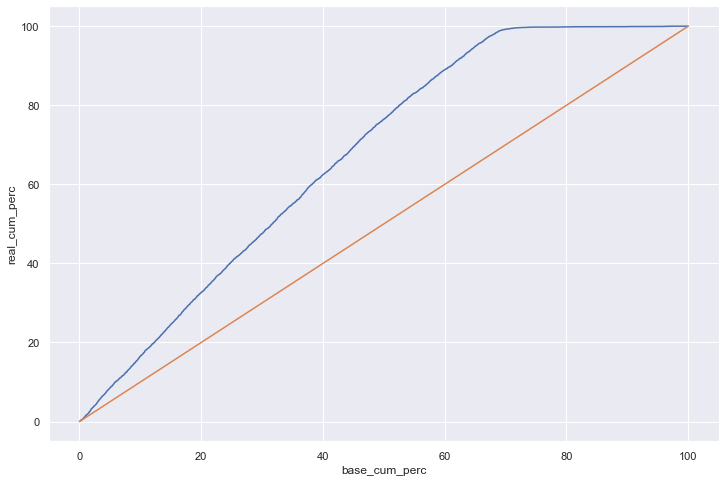

In [551]:
plt.figure( figsize=(12, 8) )
sns.lineplot( x='base_cum_perc', y='real_cum_perc', data=results )
sns.lineplot( x='base_cum_perc', y='baseline', data=results )

# 11.0 Next Step

* To enhance the Model Result:

    - Verify which kind of policys the company will be able to offer to the custumers;
    - Make a market research for pricing accordingly with each service offered to the customer;
    - Make the cost estimate for each service offered;
    